In [1]:
import os
from pathlib import Path
import pandas as pd

In [2]:
DirPpath = Path(os.path.abspath('')).parent # Fetching the current directory path - Specific for ipynb file - For .py: Path(os.path.dirname(os.path.realpath(__file__)).replace("\\", "/"))

IndexedPath  = str(DirPpath.absolute()) + "\IndexedDataV1.csv"  

In [3]:
IndexedData = pd.read_csv(IndexedPath, index_col=0)

In [4]:
IndexedData.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.062753,0.011863,-0.011524,0.047226,-0.062356,-0.055279,0.071969,-0.066768,0.052250,-0.010446,...,-0.055631,0.051366,-0.038452,0.045824,-0.025345,0.000120,-0.030103,-0.014920,-0.015391,-0.015331
1,-0.015715,-0.008296,-0.001213,0.049975,-0.060424,-0.004064,0.068767,-0.062116,0.086383,0.012939,...,-0.078854,0.061519,-0.047628,0.019746,-0.028676,0.006365,0.012383,-0.002756,0.016948,-0.016053
2,-0.020503,0.016481,0.008409,0.154522,-0.133348,-0.010912,0.121350,-0.042053,0.069117,0.047587,...,-0.116685,0.057150,0.013648,0.026396,-0.031677,0.049281,0.035520,-0.030876,0.025046,0.024246
3,-0.044219,0.040205,0.012489,0.082625,-0.015555,-0.034027,0.079859,-0.092480,0.080937,0.044868,...,-0.128878,0.007281,-0.053392,0.000170,-0.012340,0.056499,-0.012889,-0.039565,0.032355,-0.026232
4,-0.060554,-0.063971,-0.014615,0.004124,0.033607,0.053448,0.082947,-0.147704,0.116373,-0.001460,...,-0.081429,0.008725,-0.041785,0.067578,-0.045988,0.015747,0.022852,0.027206,-0.005106,-0.031018


In [6]:
# Load the Topic column from the preprocessed data
DirPpath = Path(os.path.abspath('')).parent # Fetching the current directory path - Specific for ipynb file - For .py: Path(os.path.dirname(os.path.realpath(__file__)).replace("\\", "/"))
PreprocessedPath  = str(DirPpath.absolute()) + "\PreProcessedData.csv"  
Topics = pd.read_csv(PreprocessedPath, index_col=0)

IndexedData["Topic"] = Topics["Topic"].values # Adding a Topic column to the IndexedData dataframe

## Visualization - t-SNE

Rem: PCA = uneffective, only 30% of explained variance with the 2 first components

In [7]:
from sklearn.manifold import TSNE

In [8]:
results = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(IndexedData.loc[:, IndexedData.columns != "Topic"])

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Building a new df for better visualization of t-SNE results
df = pd.DataFrame()
df["Topic"] = IndexedData["Topic"].values
df["Y1"] = results[:,0]
df["Y2"] = results[:,1]

Global

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_14808\1894863855.py:6: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


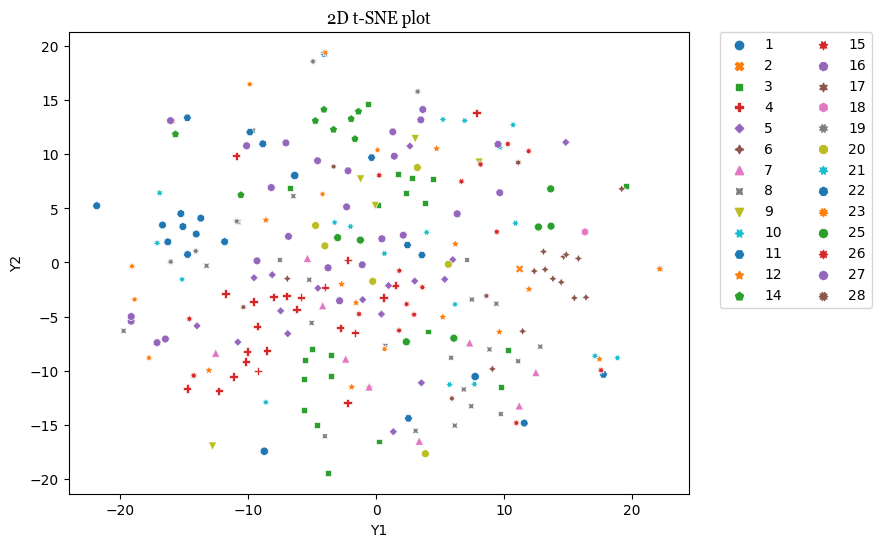

In [11]:
# Building a scatter plot for the t-SNE results
csfont = {'fontname':'Arial'} # setting font for axis labels
hfont = {'fontname':'Georgia'} # setting font for title

plt.figure(figsize=(8,6)) # setting size of the graph
sns.scatterplot(

    x="Y1", y="Y2", # Data to plot
    hue="Topic",  # Group by Topic
    palette=sns.color_palette(), # Apply a given color palette
    style = "Topic", # Ensure that each topic has a different style
    data=df, # Data source file
    legend="full", # Adding a legend
    
).set_title("2D t-SNE plot", fontdict = hfont) # Adding a title with the font hfont

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0, ncol = 2) # Placing the legend on the graph
plt.show()


In [12]:
import numpy as np
import math

x = np.array(IndexedData.loc[:, IndexedData.columns != "Topic"])
tss = []

for i in range(0,252):

    tss.append((math.dist(x[i,:], np.mean(x, axis = 0)))**2)

c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

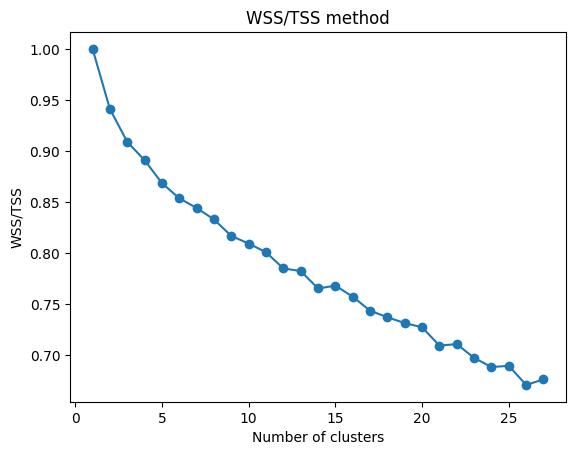

In [13]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,28):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_ / sum(tss))

plt.plot(range(1,28), inertias, marker='o')
plt.title('WSS/TSS method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS/TSS')
plt.show()

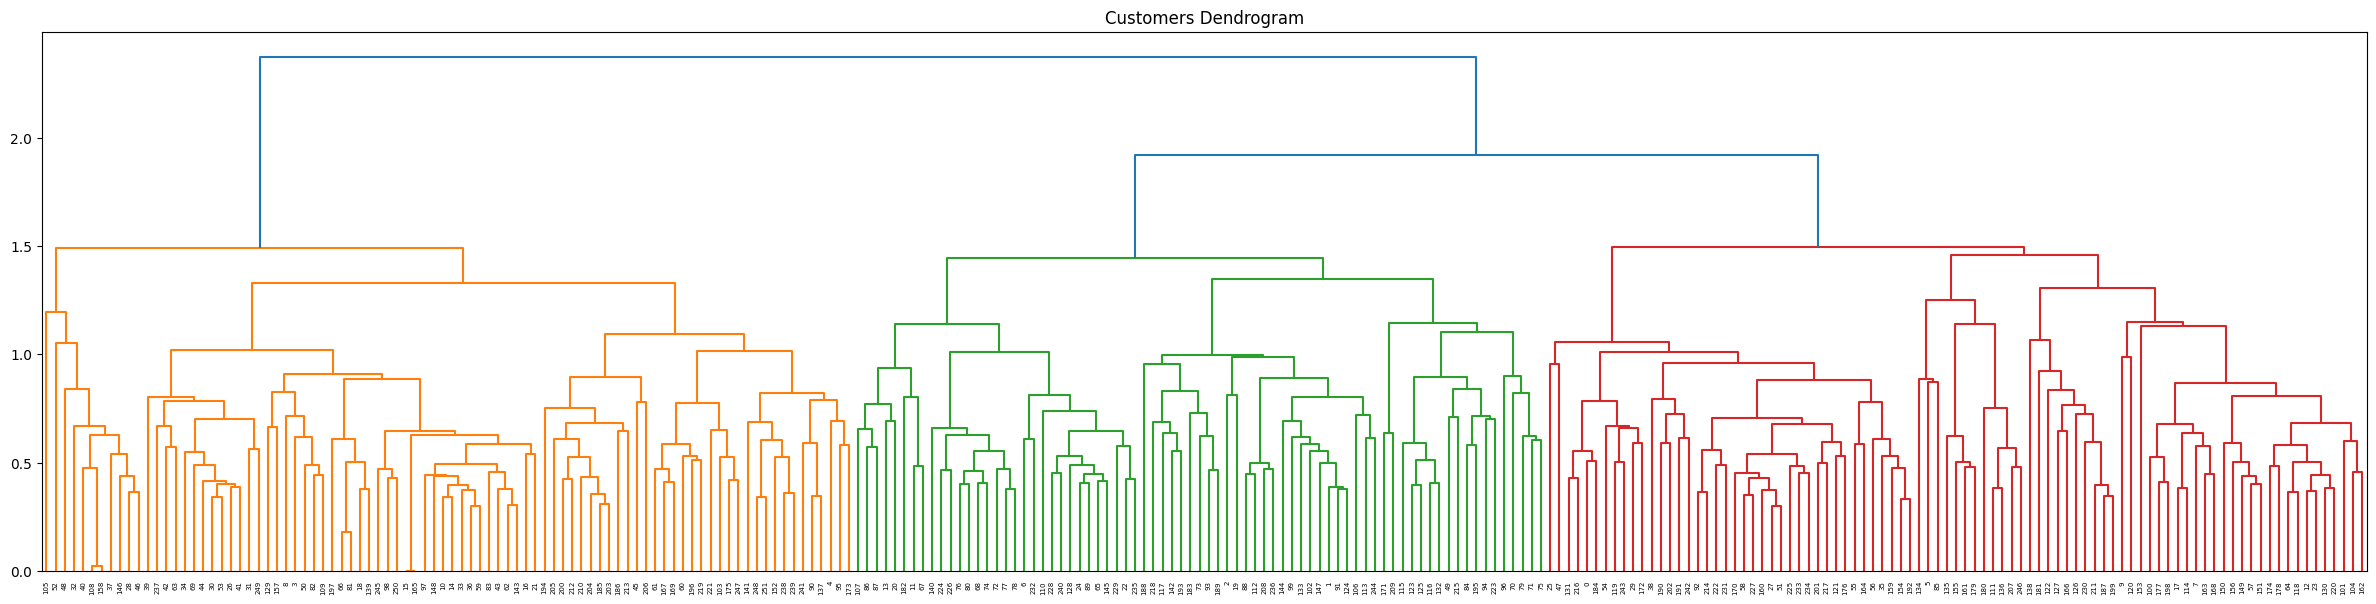

In [14]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = x
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

Topic by Topic

In [15]:
# Creating a function for building tSNE plots
def tSNEPlot(x, topic):

    csfont = {'fontname':'Arial'} # Font name for labels
    hfont = {'fontname':'Georgia'} # Font name for title

    ax = plt.axes()
    ax.scatter(x["Y1"], x["Y2"], c="#d04a02", marker= "v") # Setting data to plot, color, and markers type
    ax.set_title("2D t-SNE plot of Topic " + str(topic), **hfont) # Defining a title and its format
    ax.set_ylabel("Y2", **csfont) # Defining y-label
    ax.set_ylim(-25,25) # Standardizing the scale of y axis
    ax.set_xlabel("Y1", **csfont) # Idem for x axis
    ax.set_xlim(-25,25)

    ax.set_facecolor((218 / 255, 222 / 255, 224 / 256)) # Formatting the background's color
    plt.grid(which='major', color='w', linestyle='-') # Adding a grid to the background
    ax.set_axisbelow(True)  # Formatting the axis style
    for spine in ax.spines:
        ax.spines[spine].set_color('white')

    plt.show()

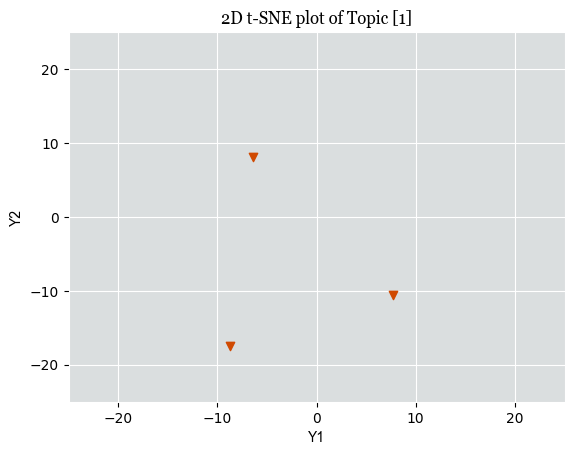

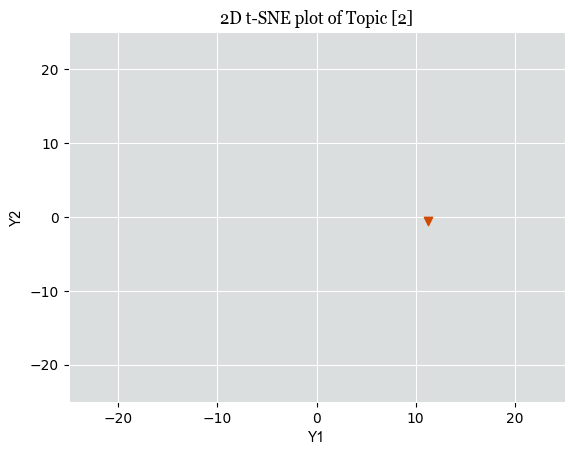

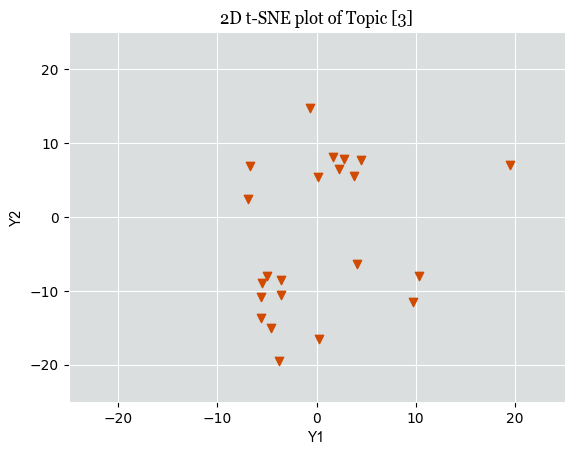

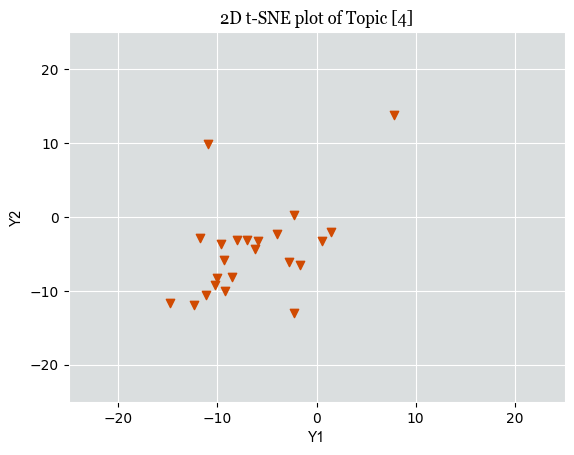

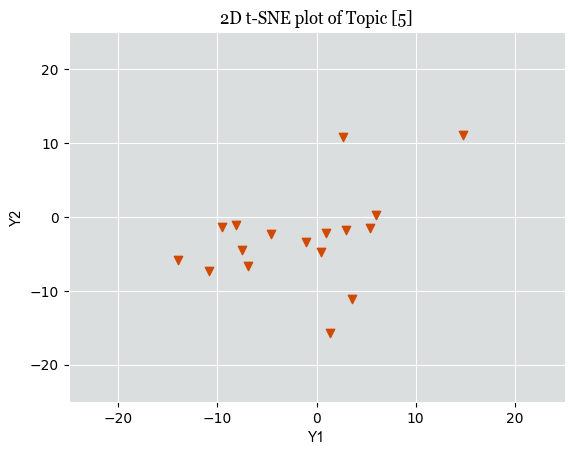

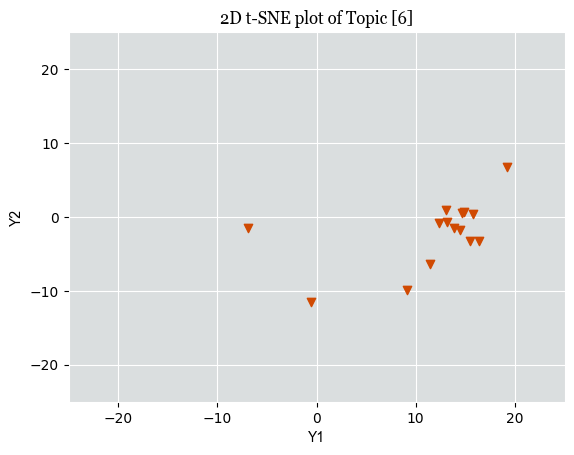

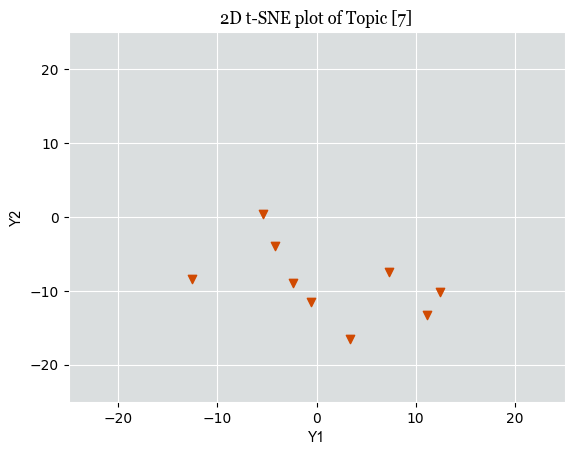

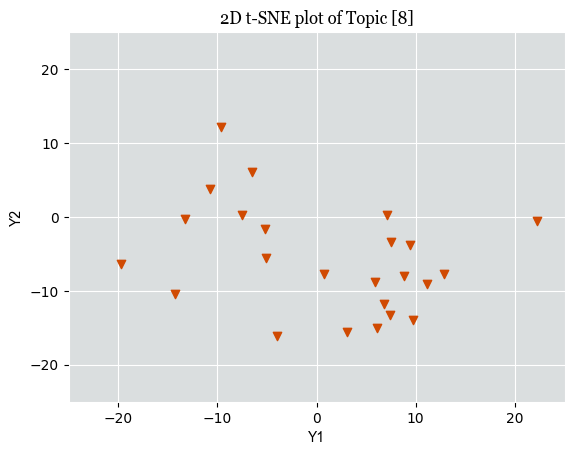

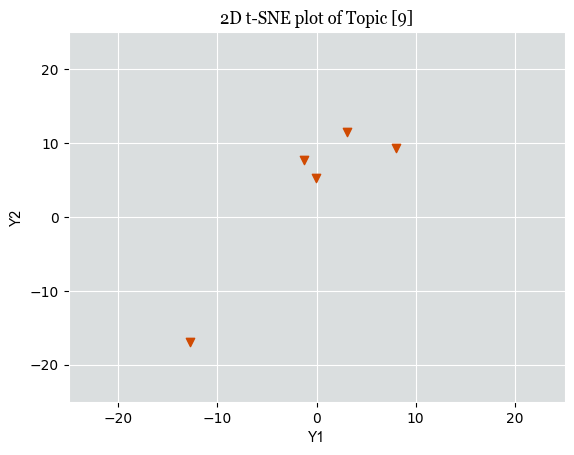

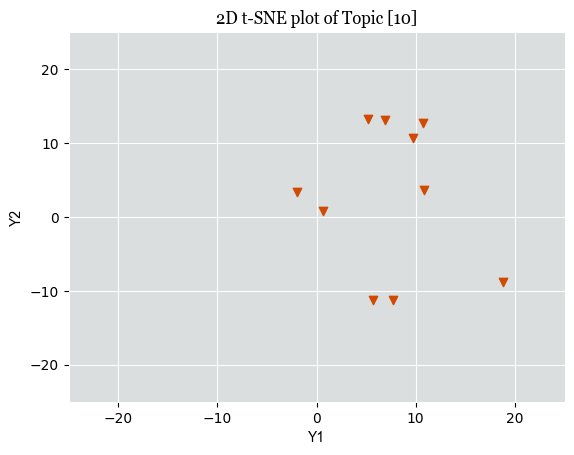

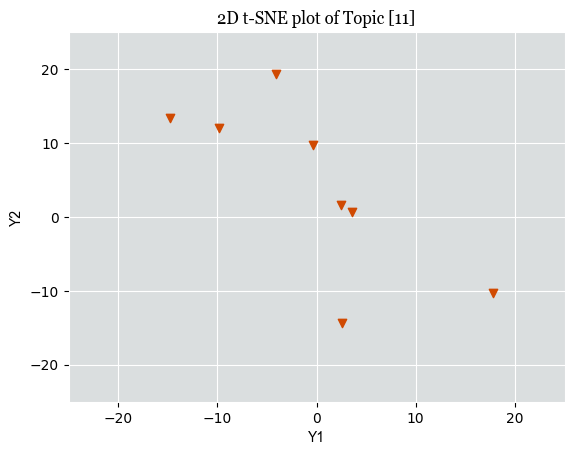

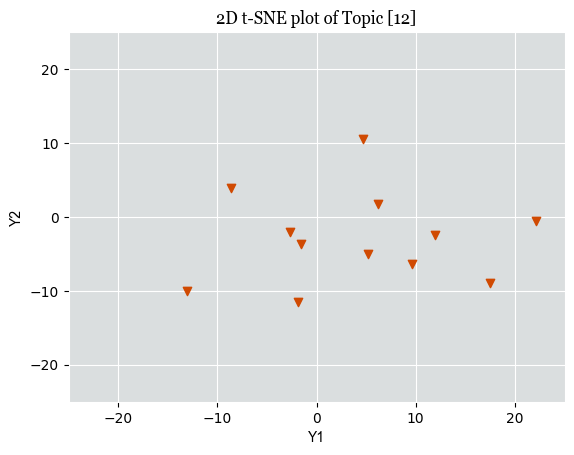

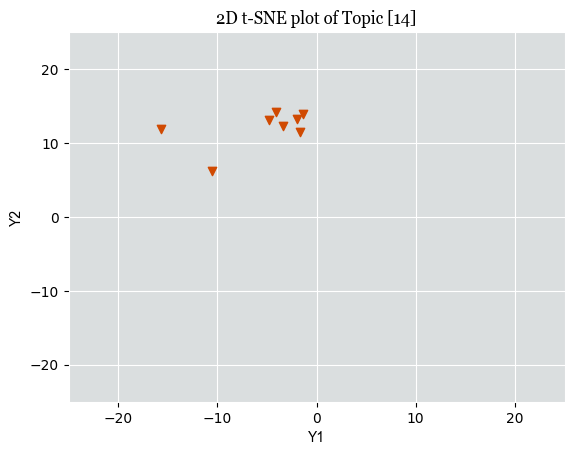

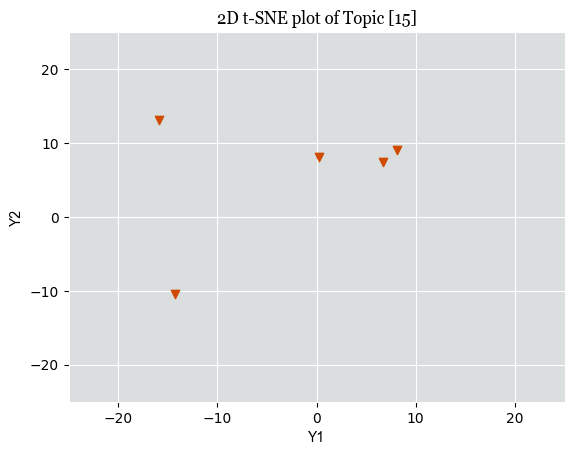

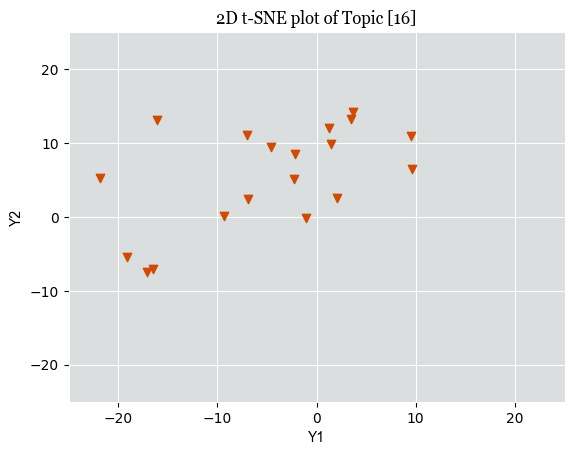

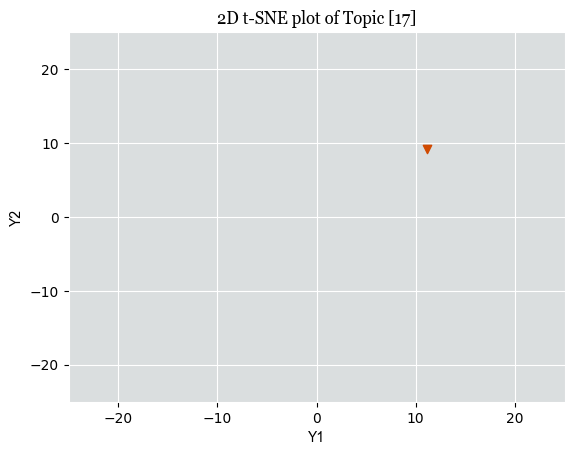

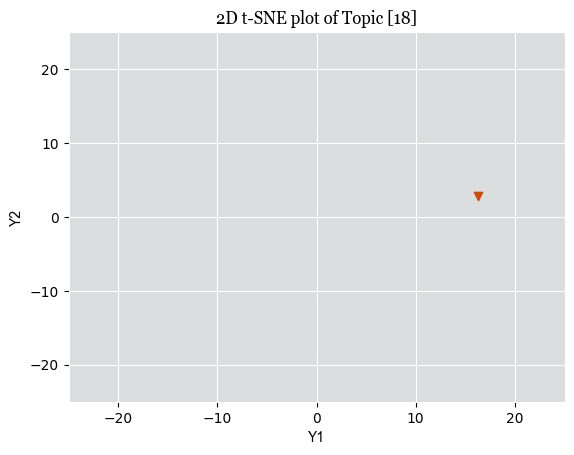

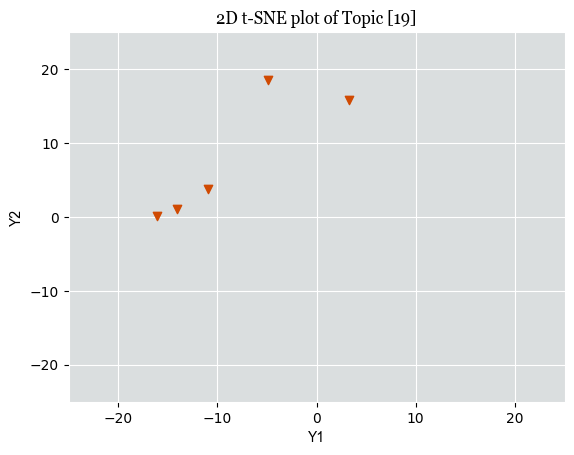

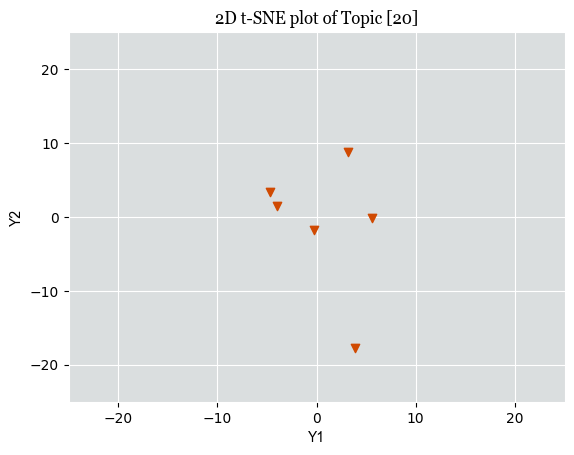

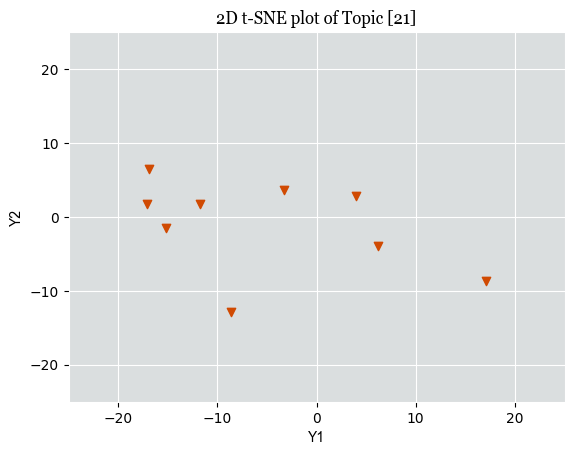

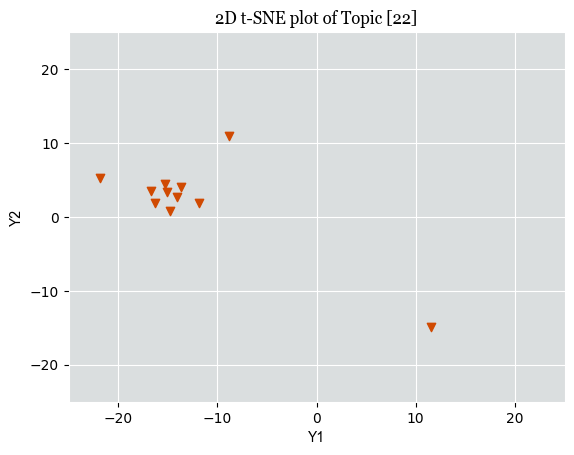

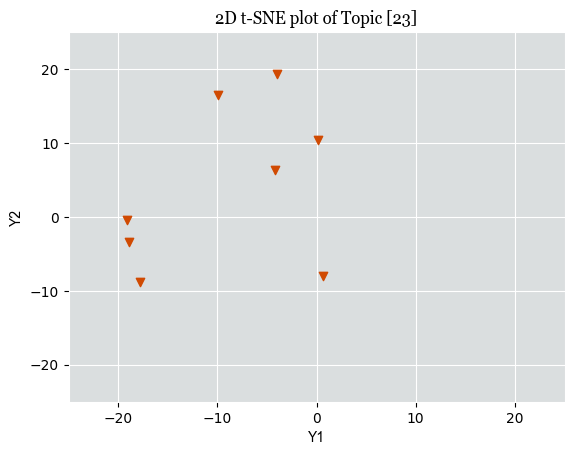

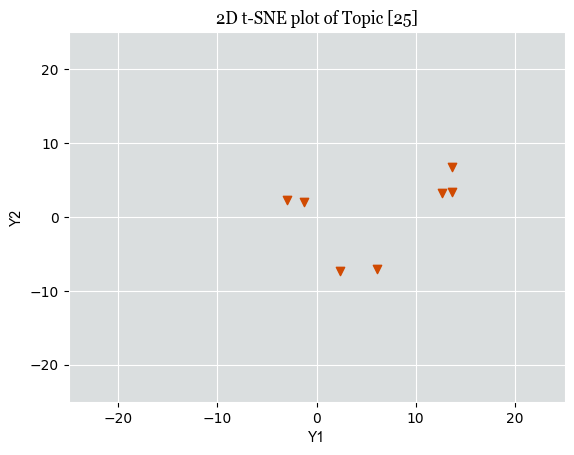

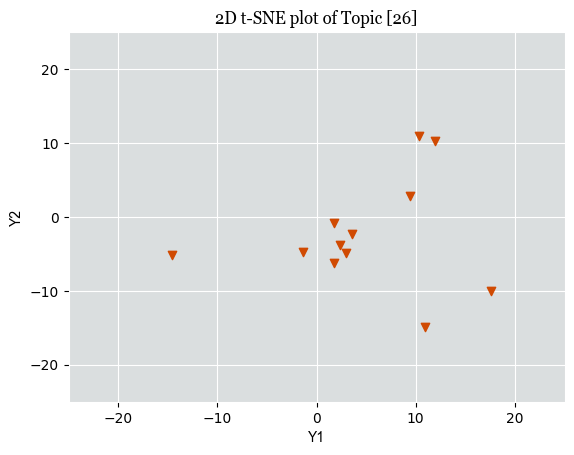

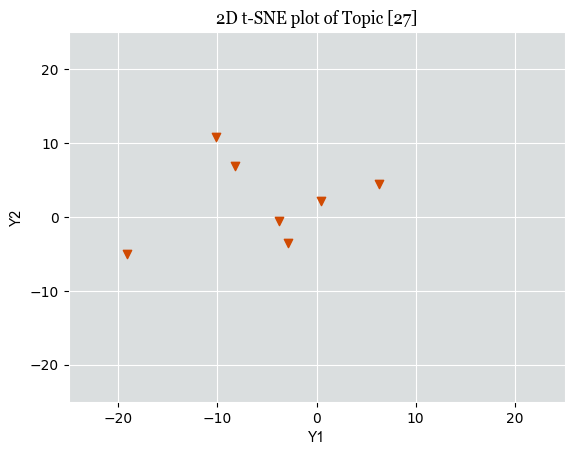

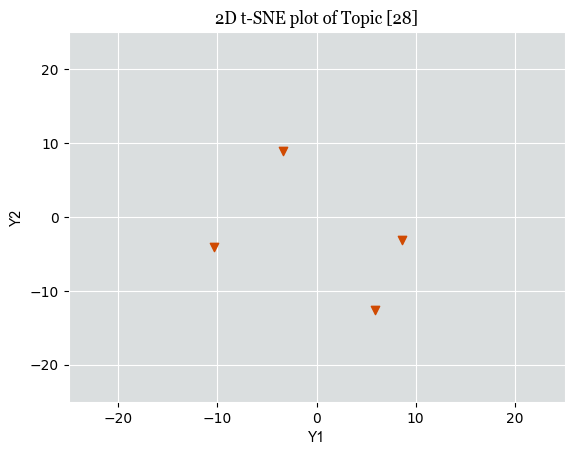

""


In [16]:
# Applying the function on all Topic
df.groupby('Topic').apply(lambda x: tSNEPlot(x, x["Topic"].unique()))

In [17]:
# Define WSS function
from statistics import variance
import numpy as np
import math

def WSS(data):


    x = np.array(data)
    wss = []

    for i in range(0,x.shape[0]):

        wss.append((math.dist(x[i,:], np.mean(x, axis = 0)))**2)

    return sum(wss)

def TSS(data):

    x = np.array(data)
    size = x.shape[0]
    tss = []

    for i in range(0,size):

        tss.append((math.dist(x[i,:], np.mean(x, axis = 0)))**2)

    return sum(tss)   


In [19]:
# Creating function for dendrogram drawing

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

def Dendro(x):

    print("Dendrogram: \n")
    plt.figure(figsize=(30, 7))
    plt.title("Topics Dendrogram")

    # Selecting Annual Income and Spending Scores by index
    selected_data = x
    clusters = shc.linkage(selected_data, 
                method='ward', 
                metric="euclidean")
    shc.dendrogram(Z=clusters)
    plt.show()


# Creating function for building elbow method graphs

from sklearn.cluster import KMeans
import numpy as np

def ElbowGraph(x):

    print("Elbow Graph: \n")
    inertias = []
    size = np.array(x).shape[0]

    for i in range(1, size):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(x)
        inertias.append(kmeans.inertia_ / TSS(x))

    plt.plot(range(1,size), inertias, marker='o')
    plt.title('WSS/TSS method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WSS/TSS')
    plt.show()

# Graph Analysis function
def GraphAnalysis(x):

    print("Cluster Analysis of Topic: \n")

    ElbowGraph(x)
    Dendro(x)


Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


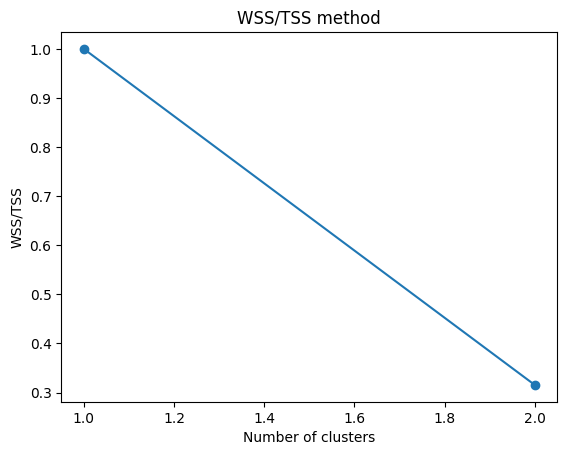

Dendrogram: 



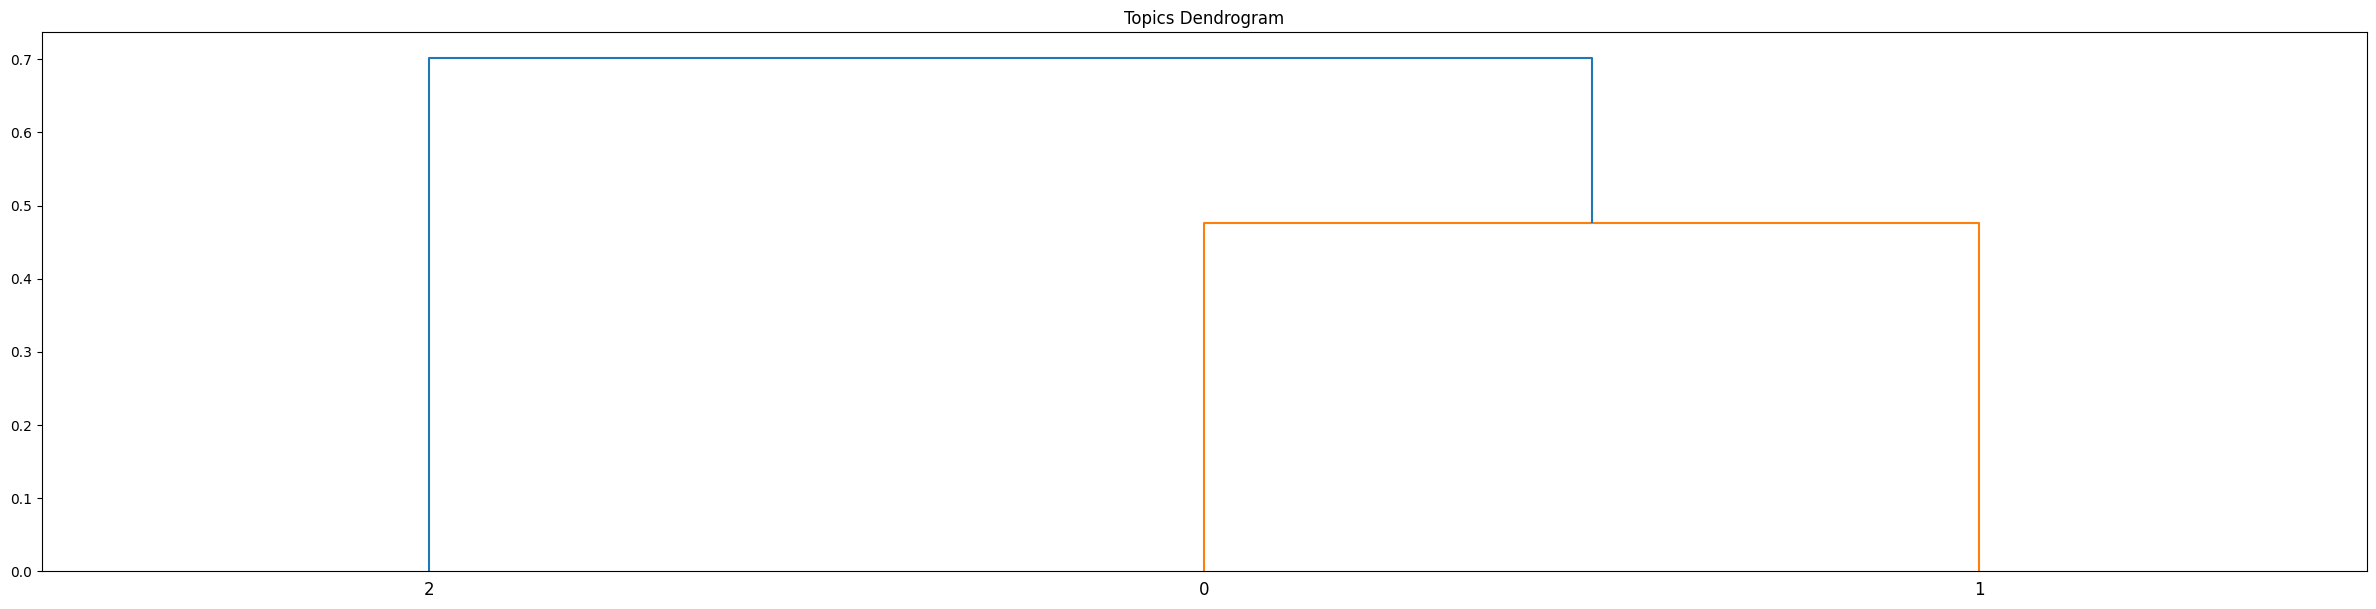

Less than two items in the topic
Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

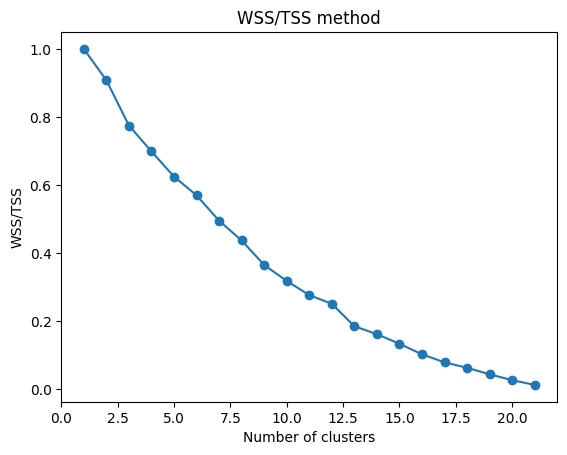

Dendrogram: 



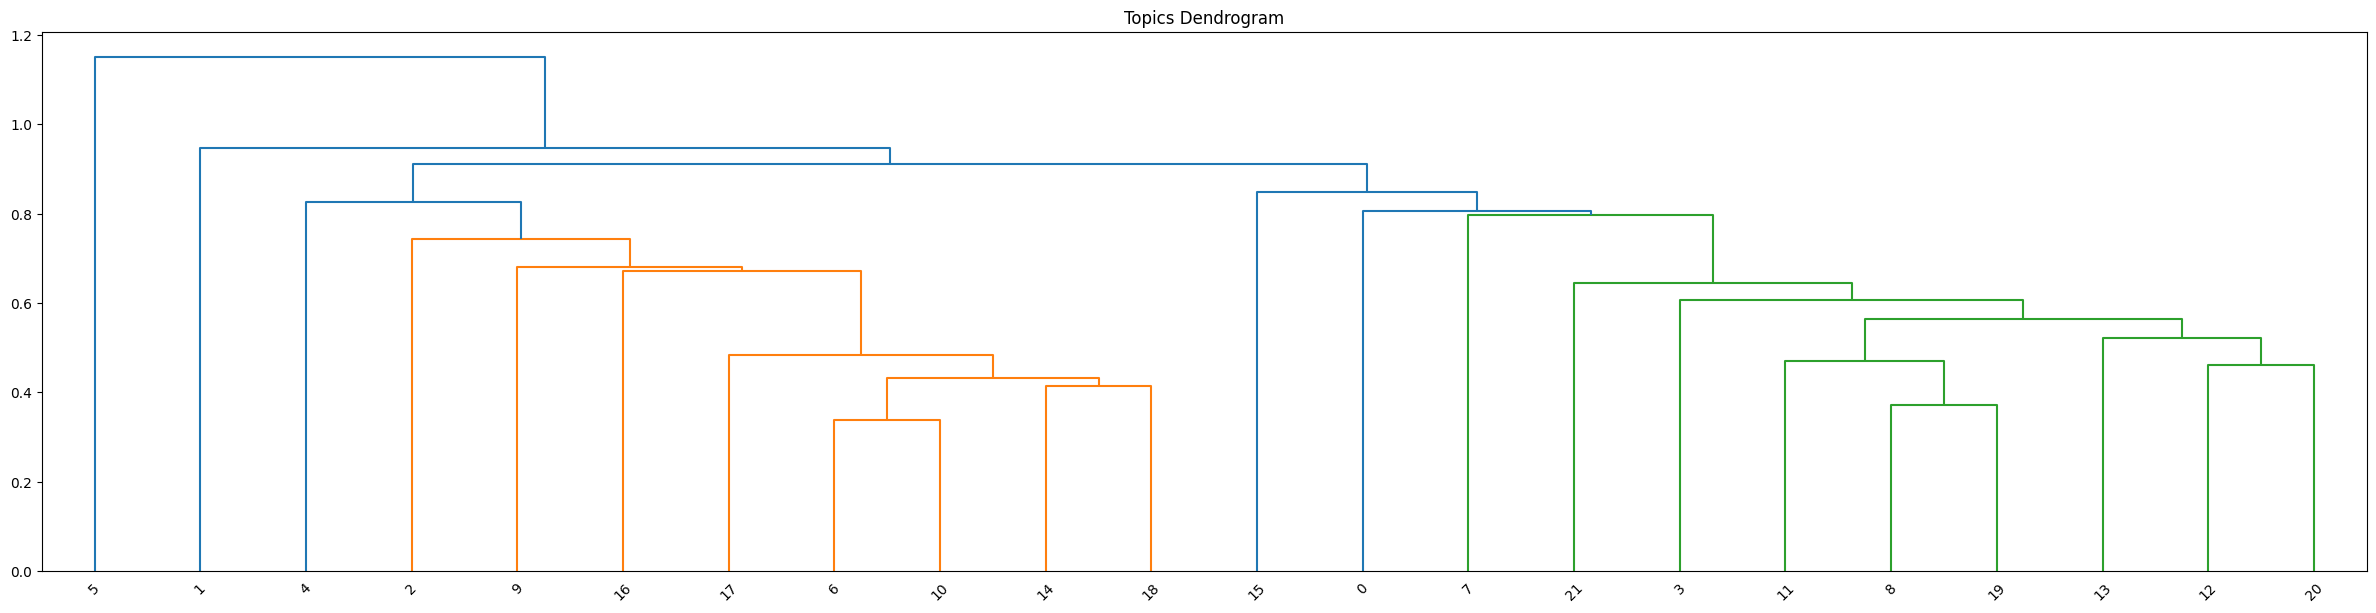

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

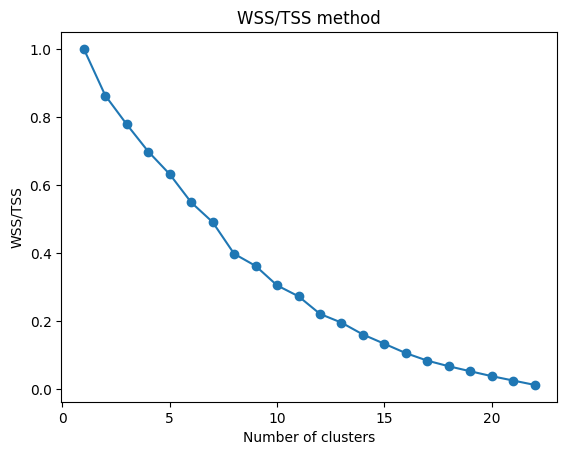

Dendrogram: 



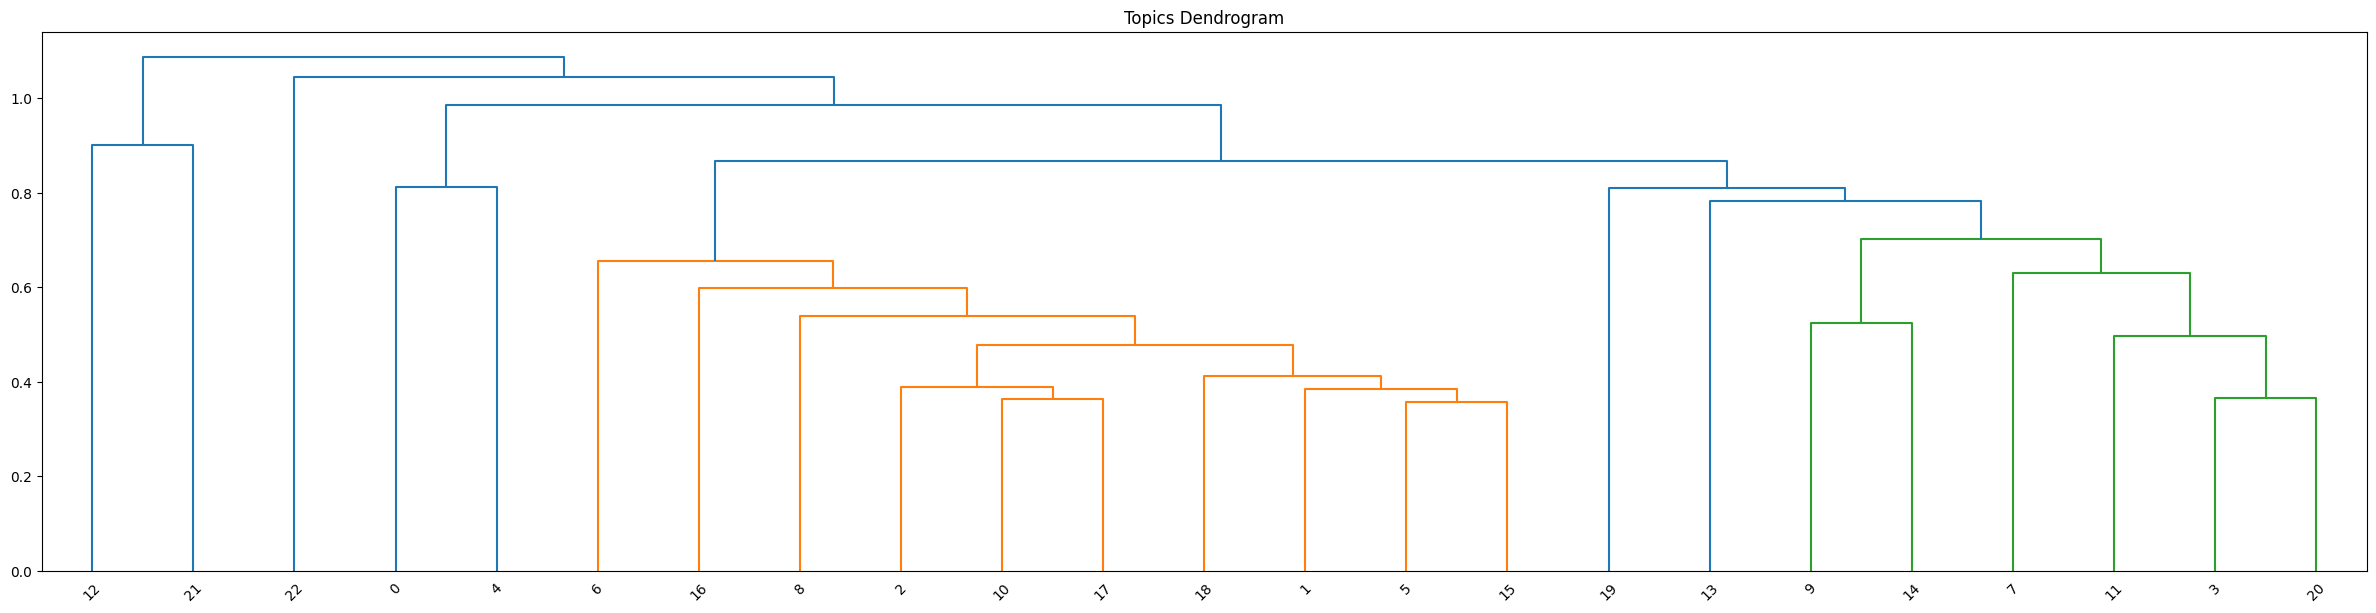

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

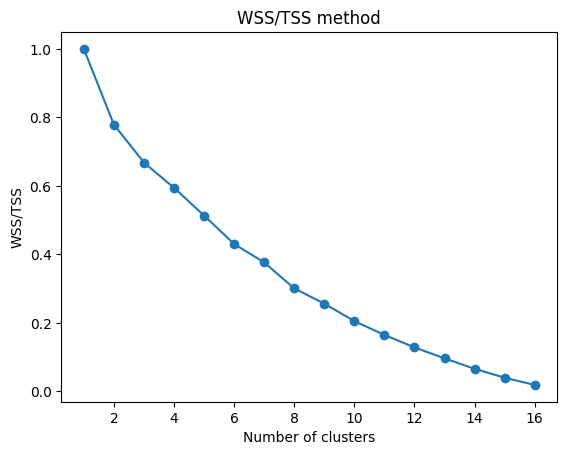

Dendrogram: 



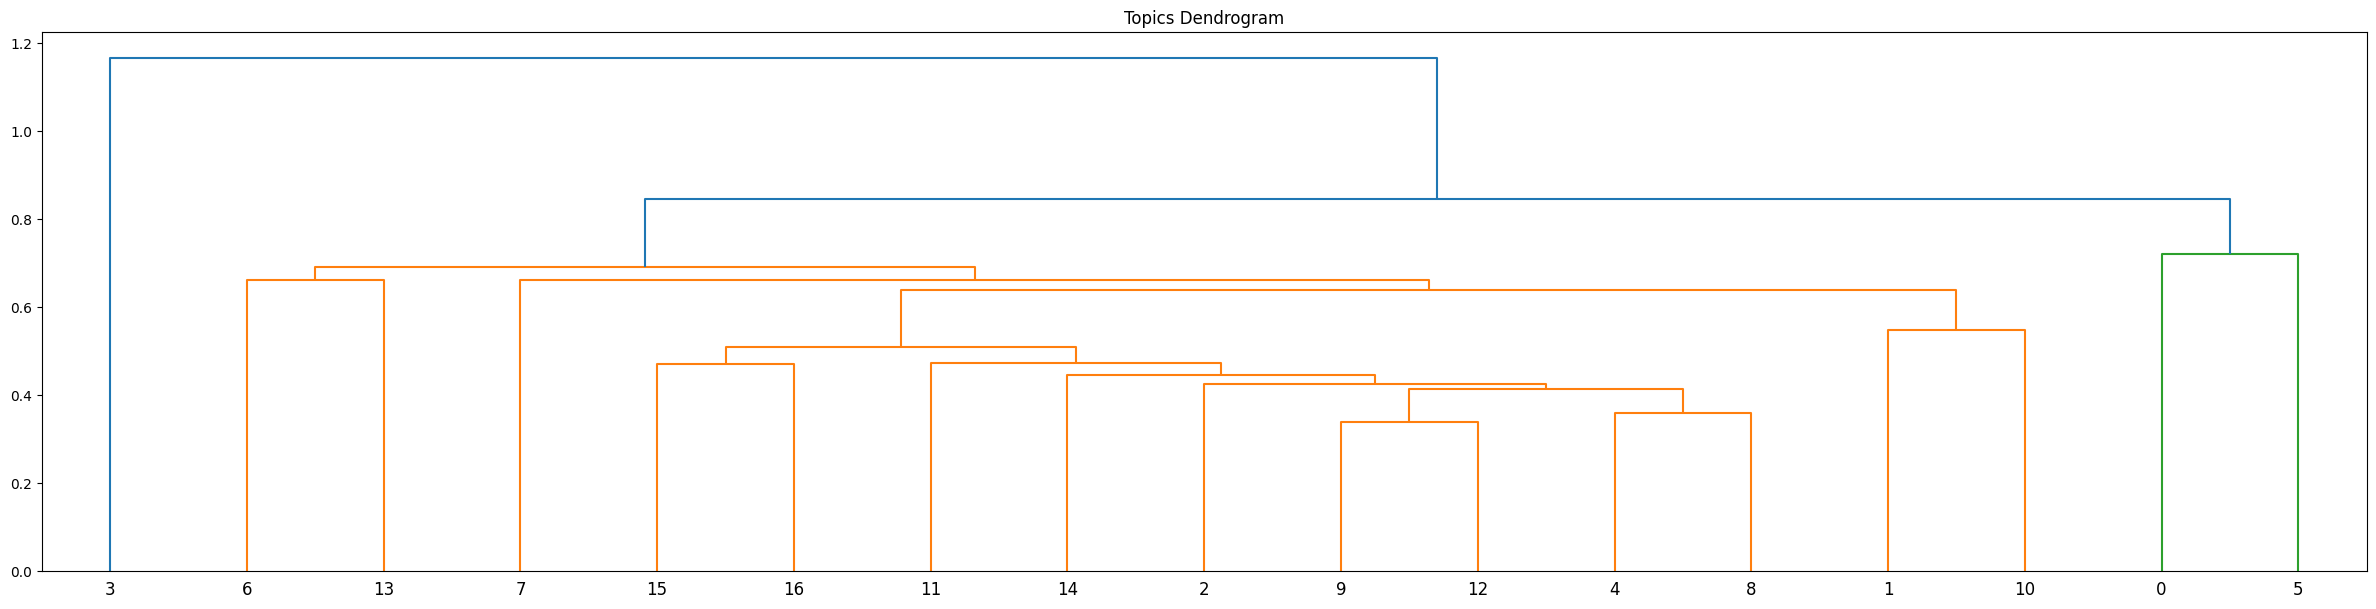

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

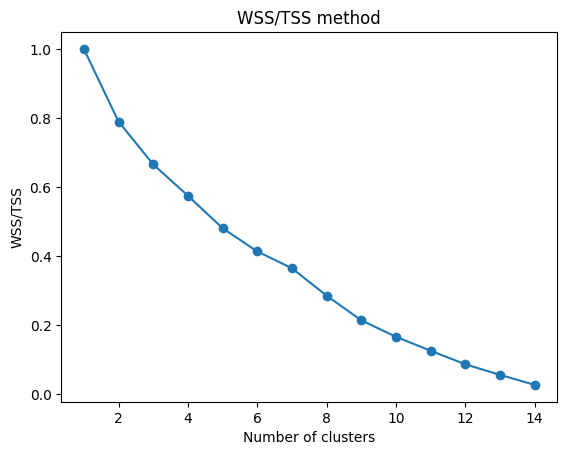

Dendrogram: 



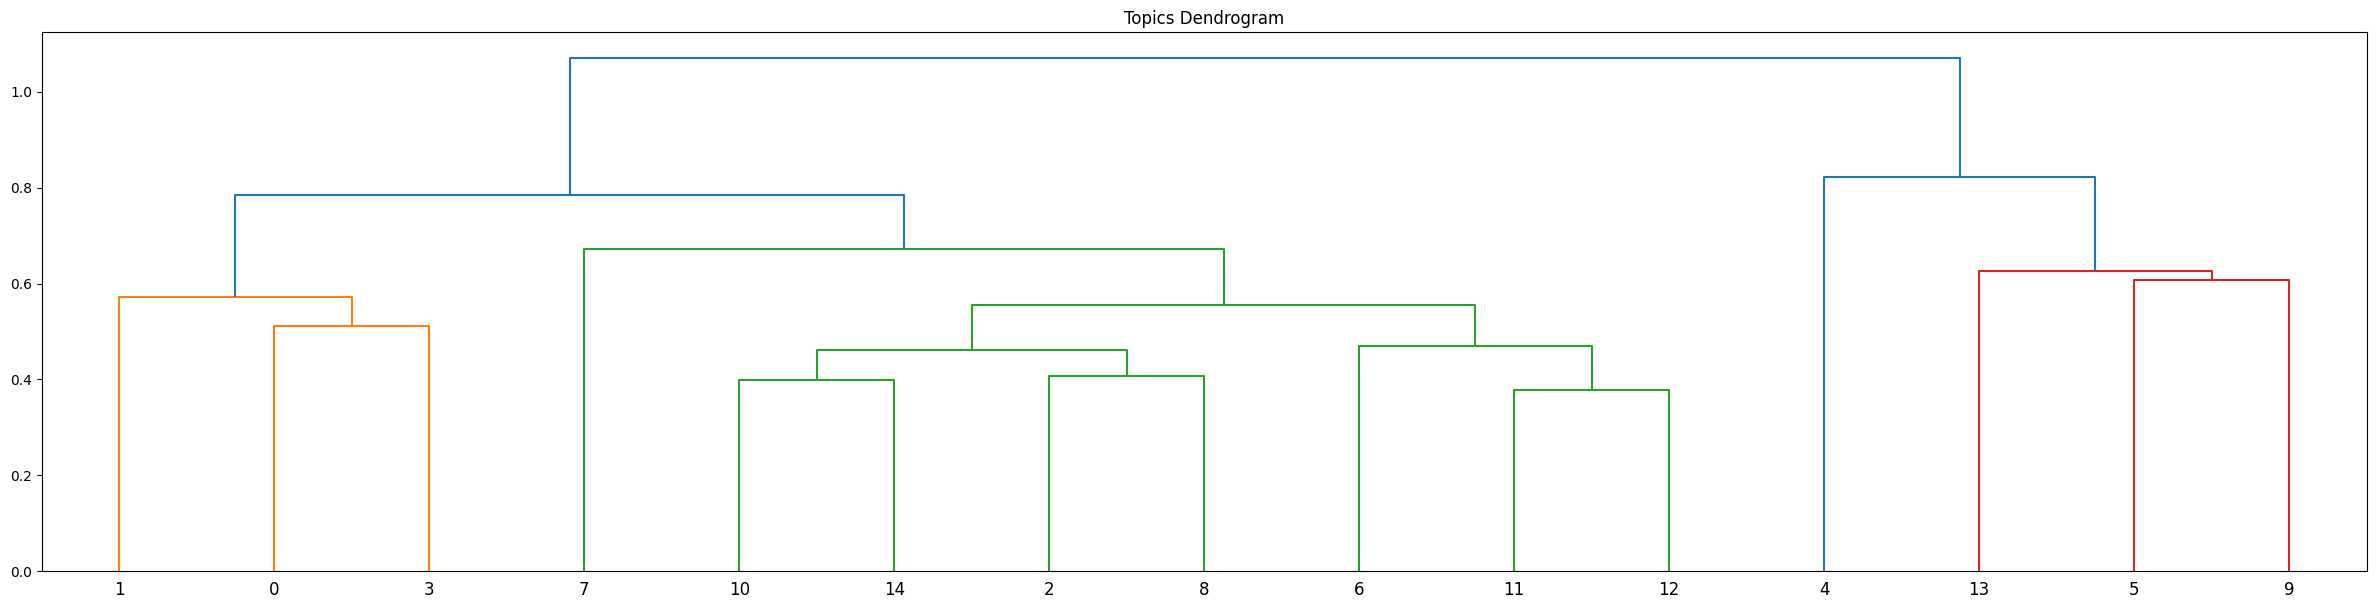

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

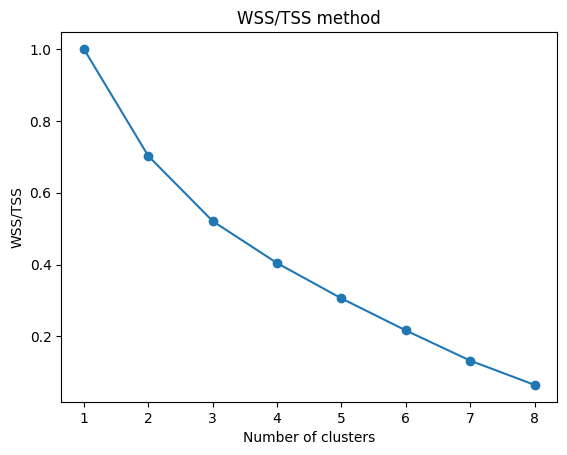

Dendrogram: 



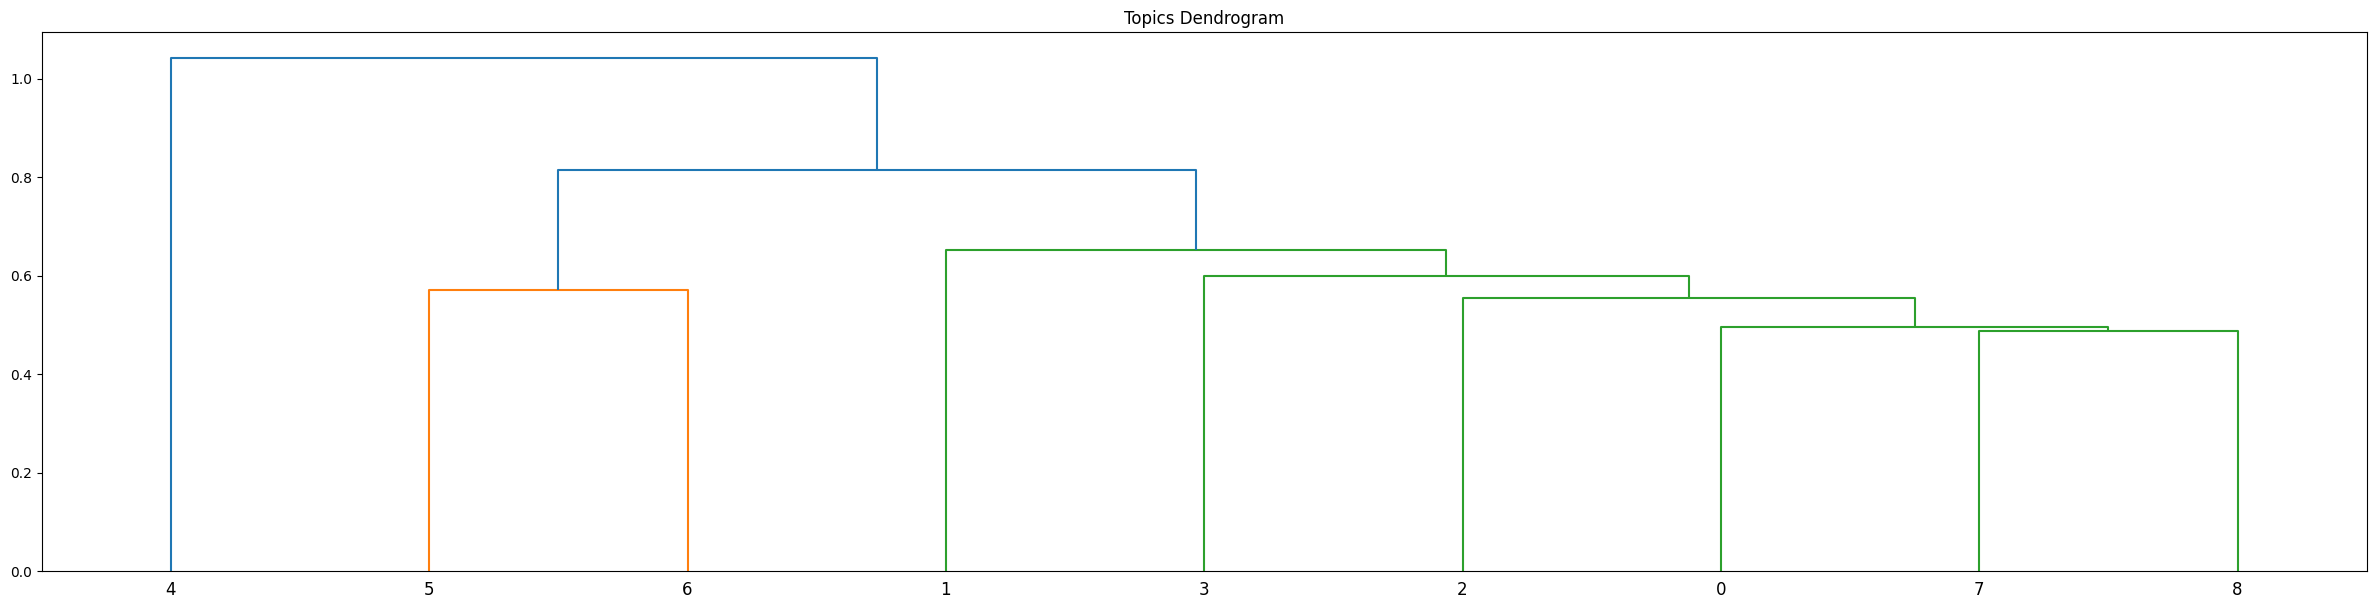

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

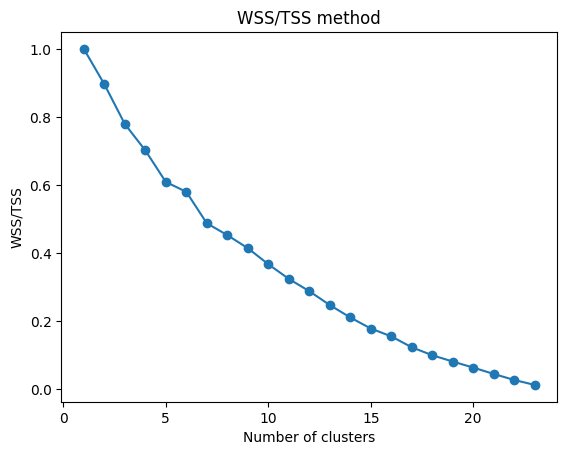

Dendrogram: 



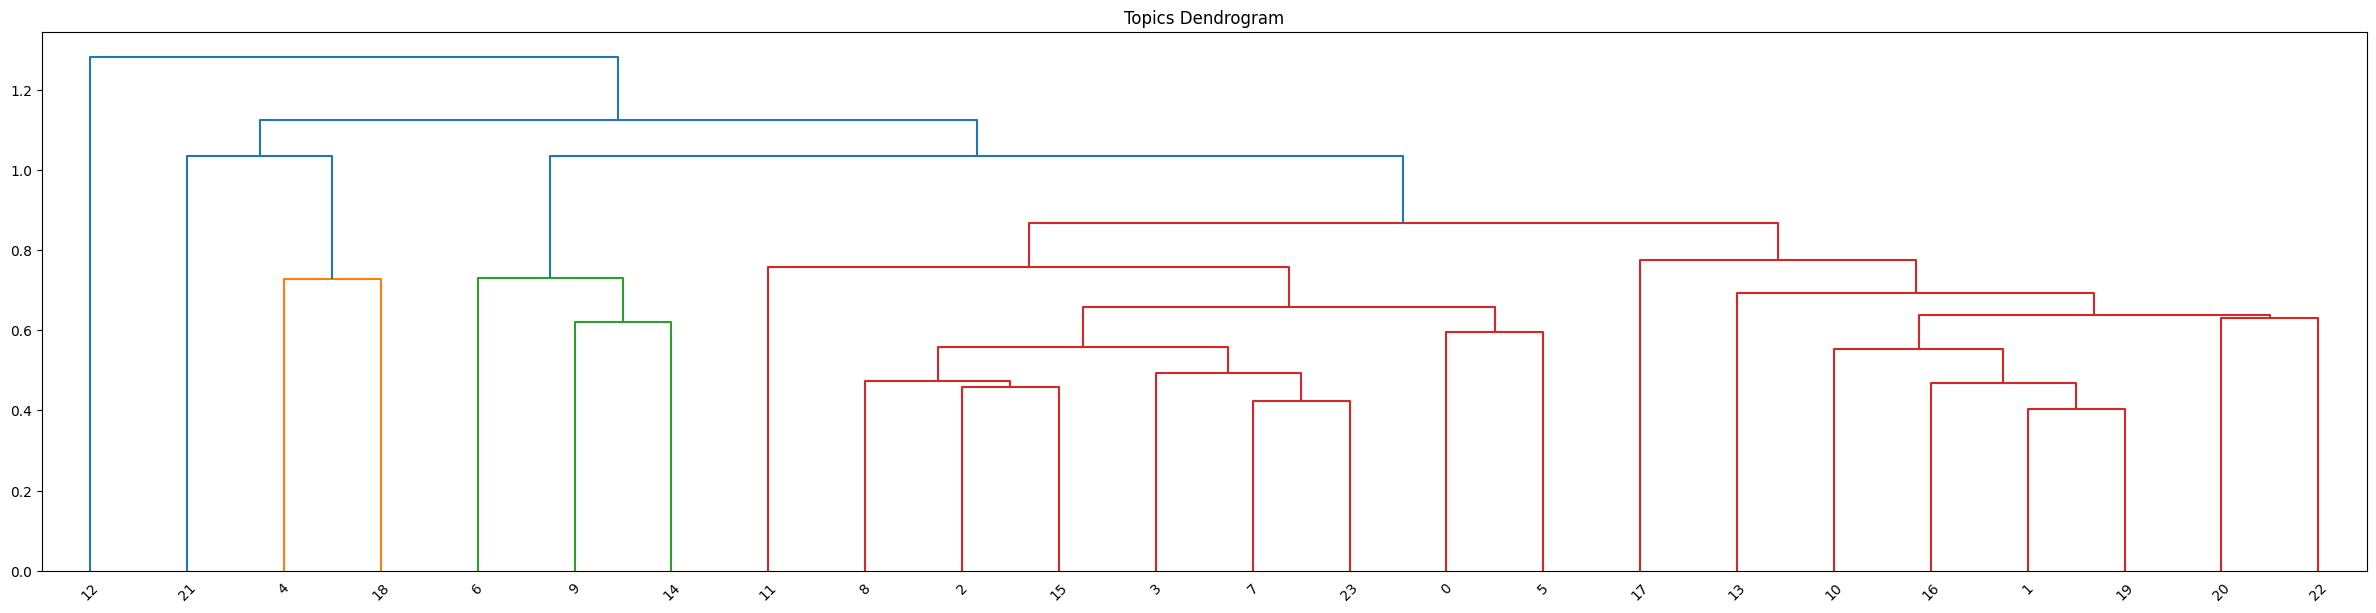

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

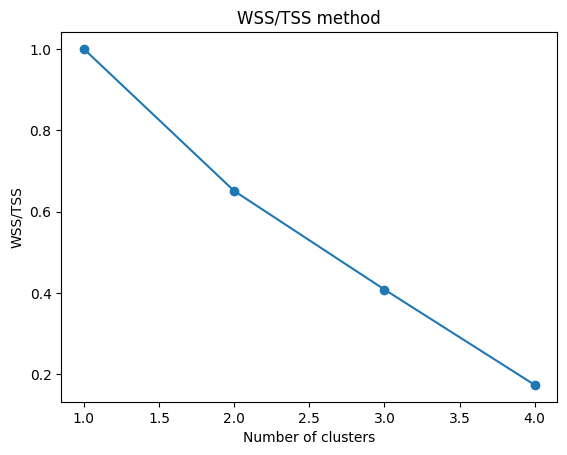

Dendrogram: 



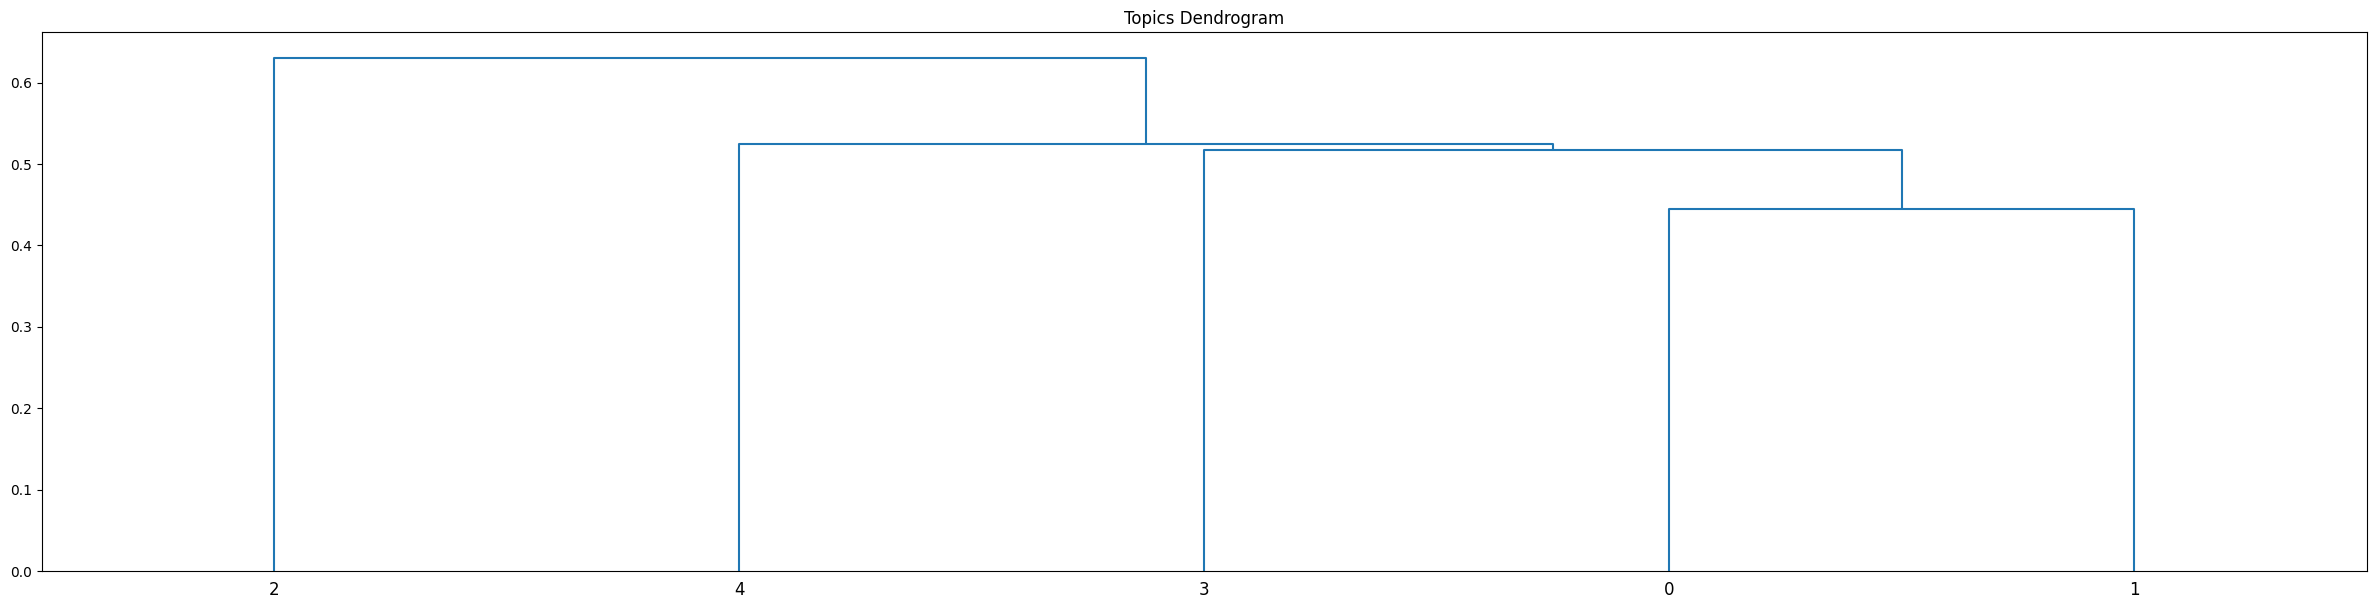

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

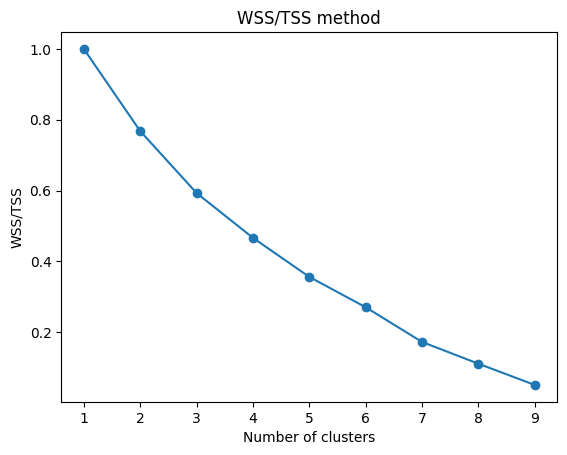

Dendrogram: 



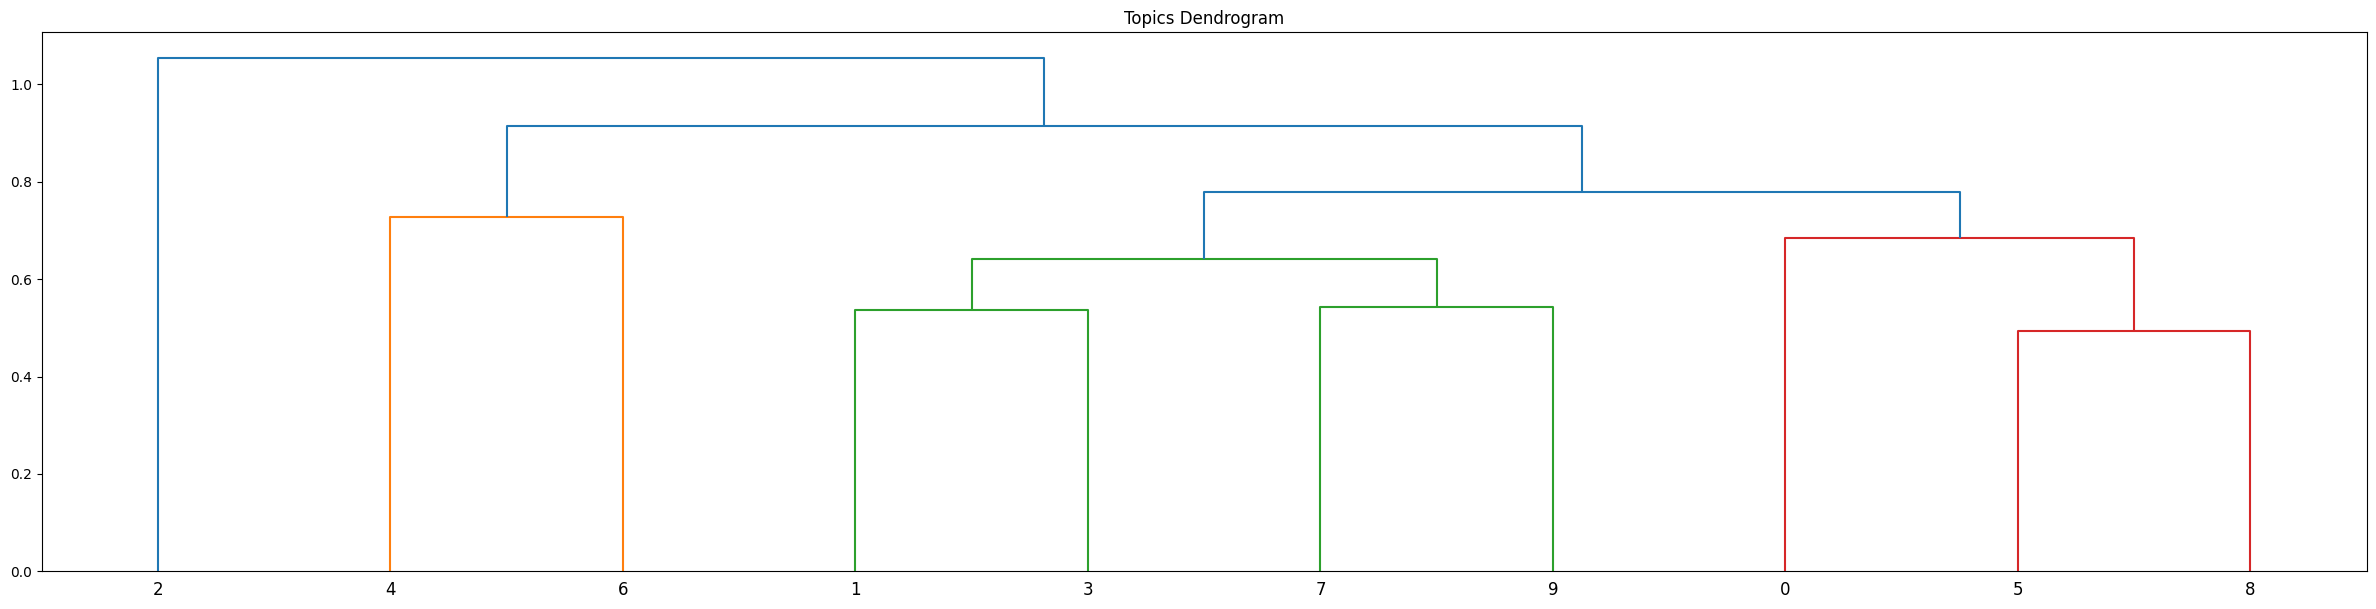

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

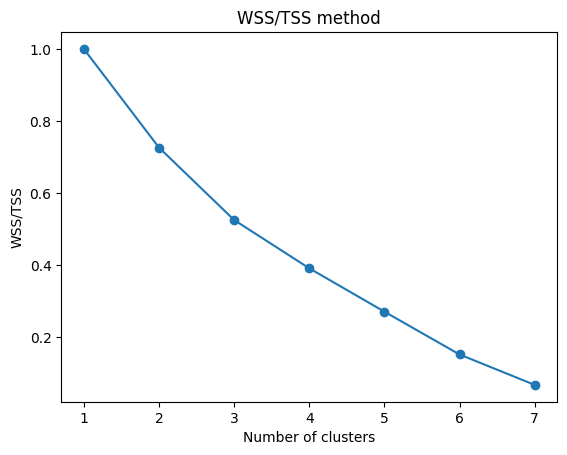

Dendrogram: 



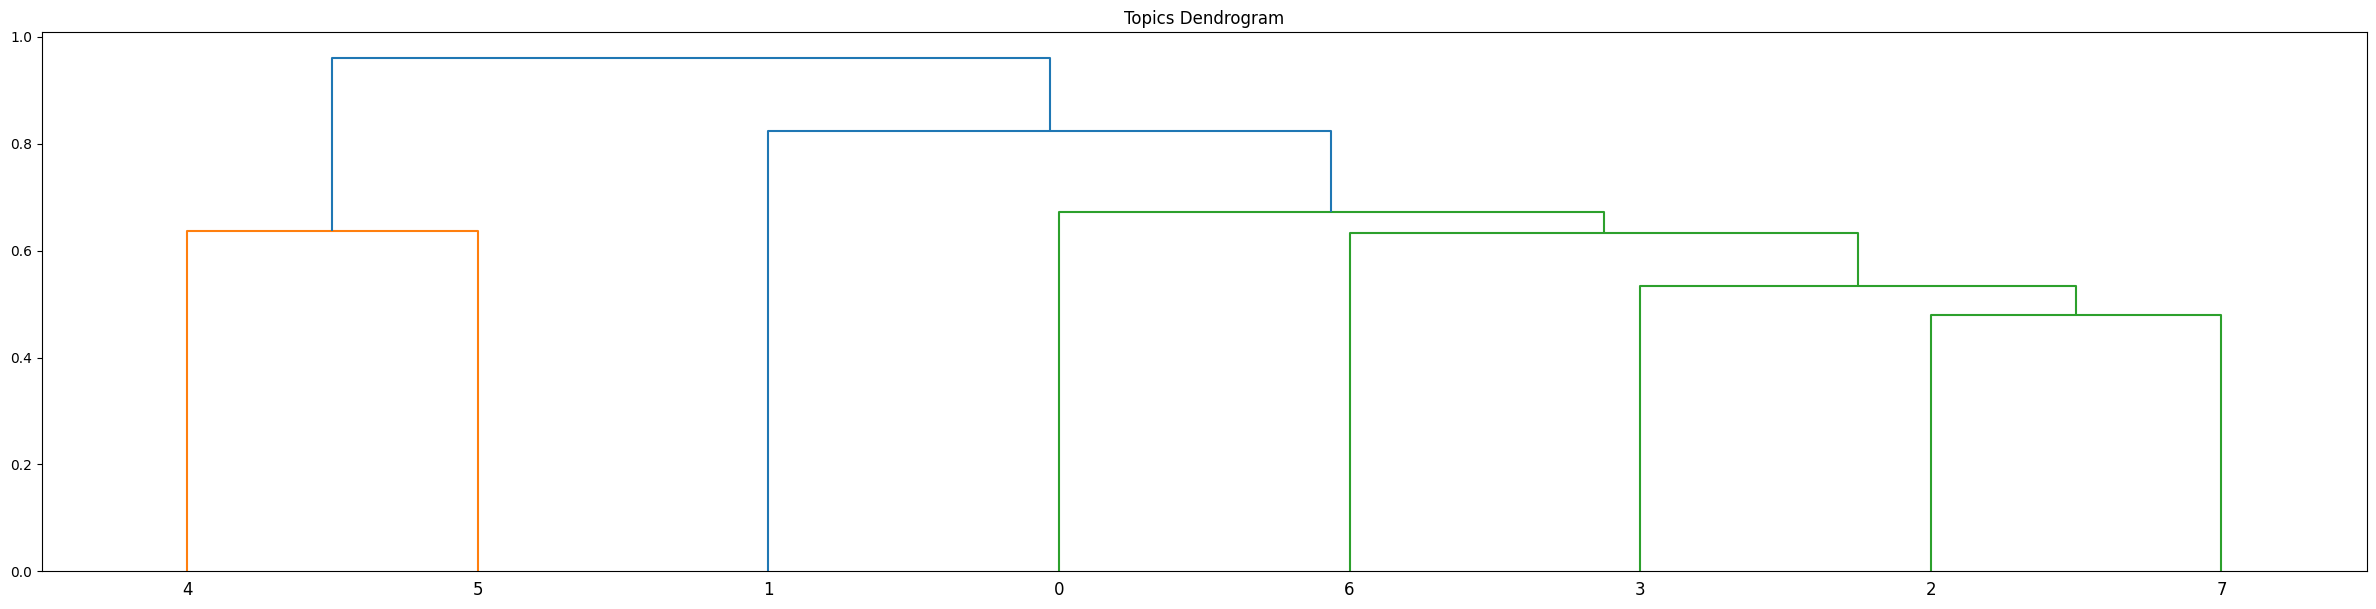

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

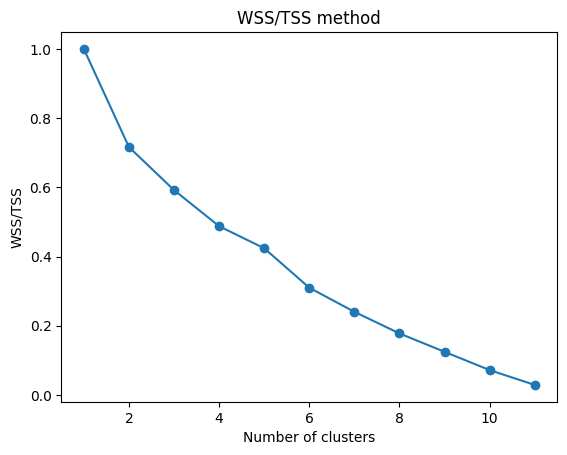

Dendrogram: 



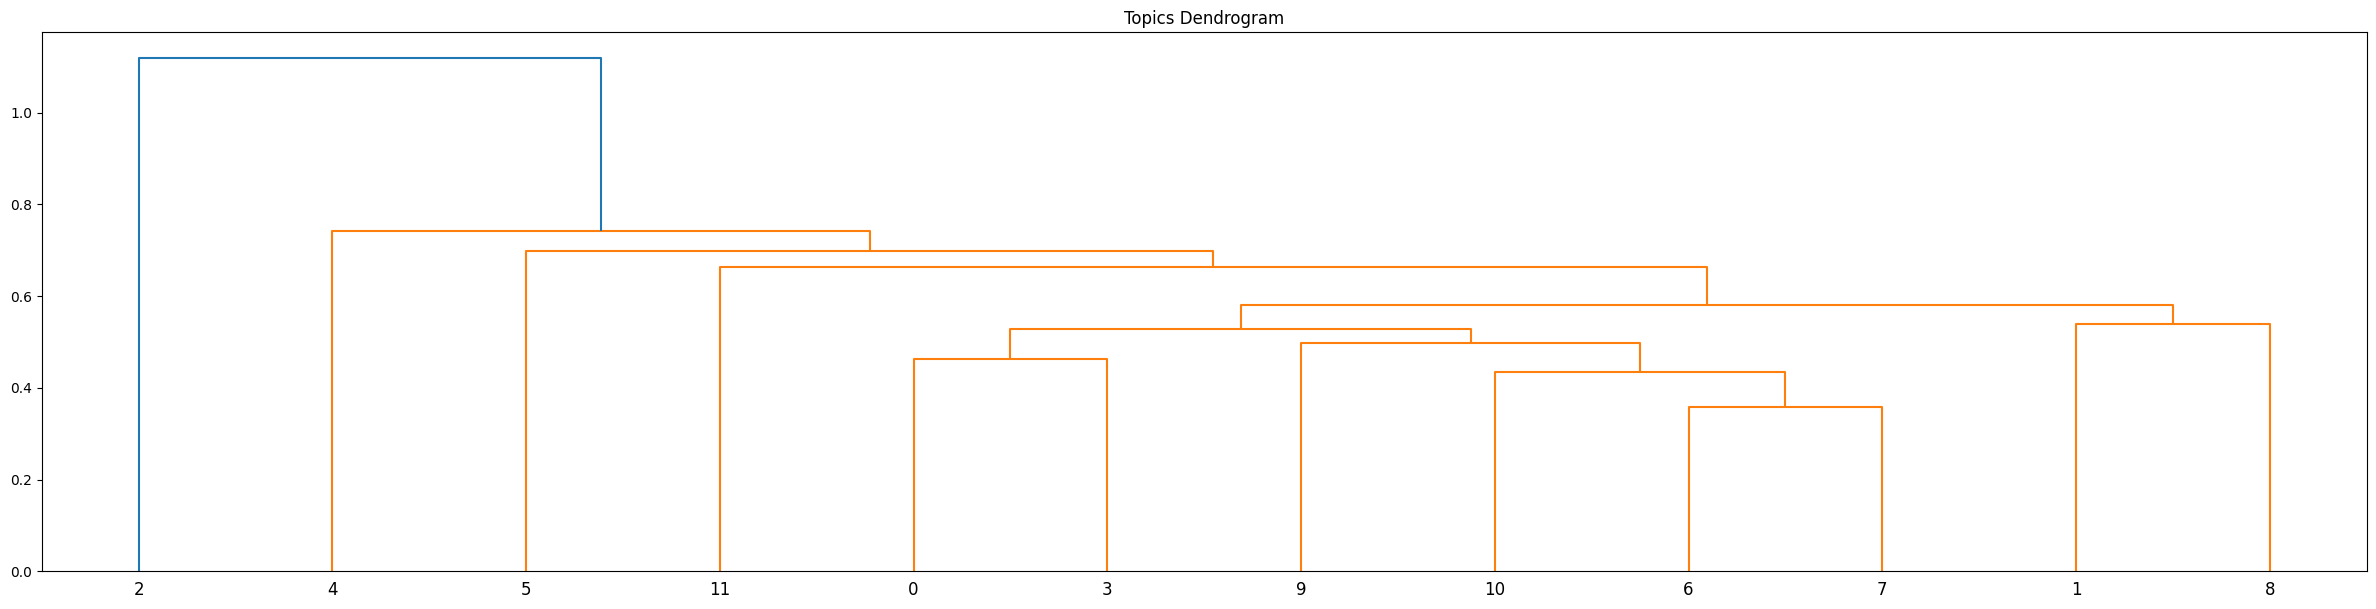

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

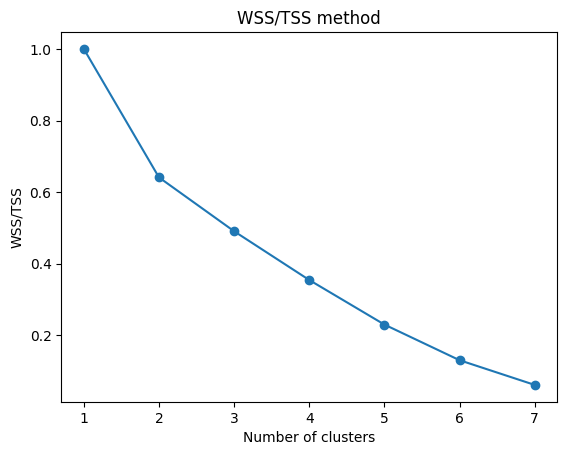

Dendrogram: 



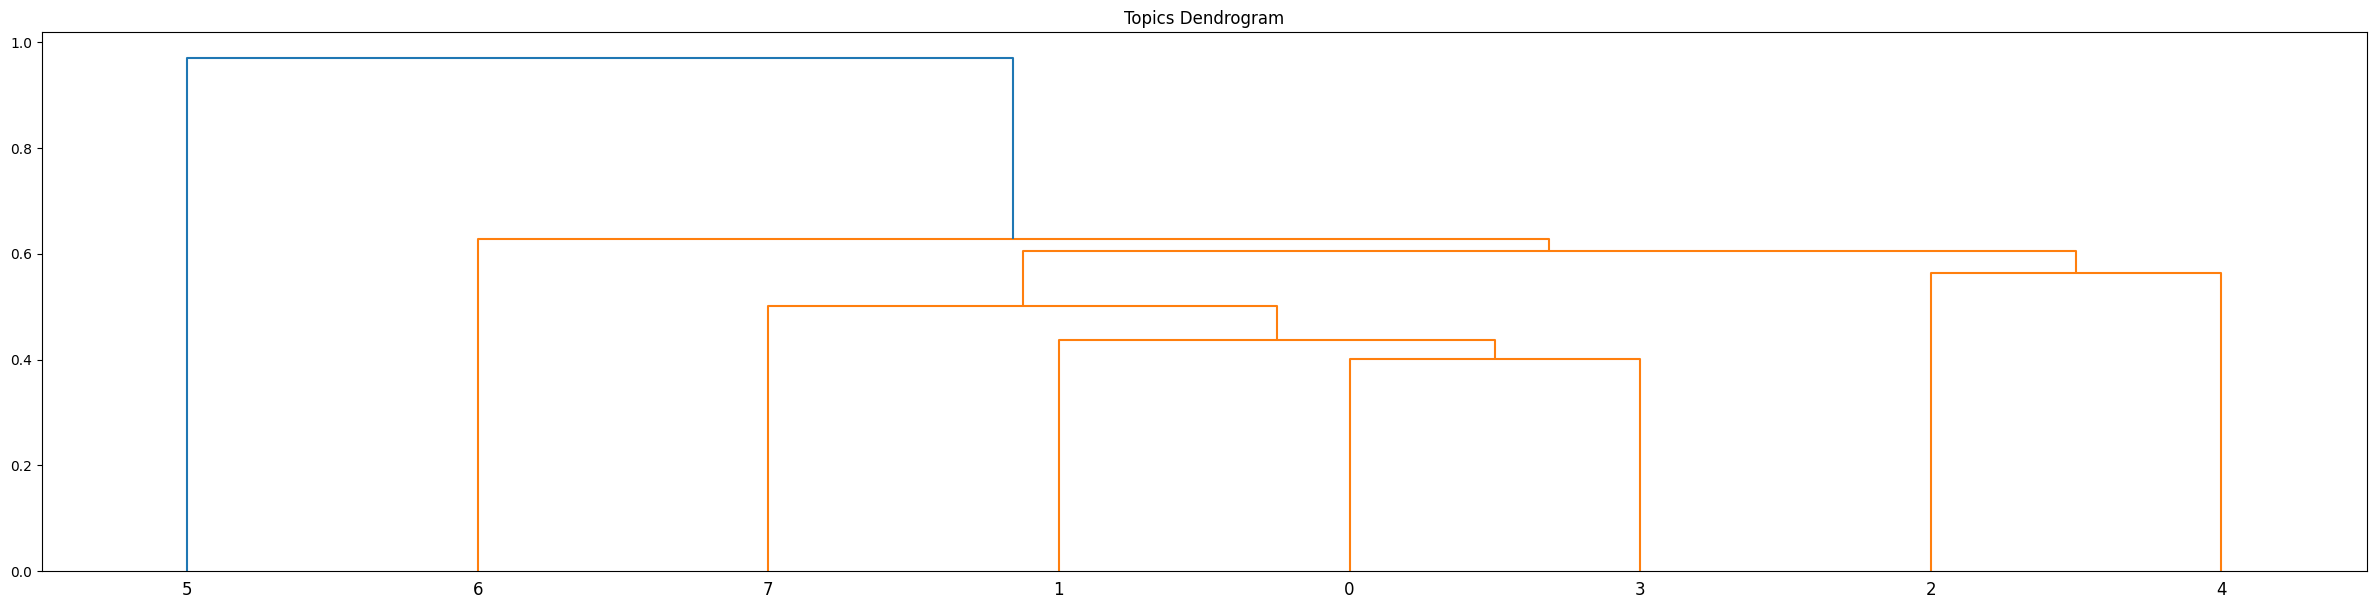

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

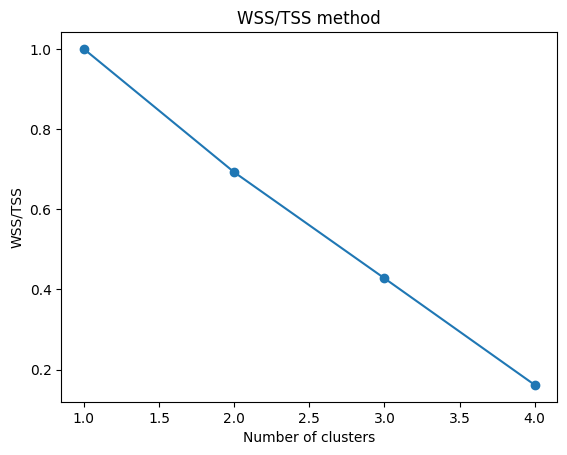

Dendrogram: 



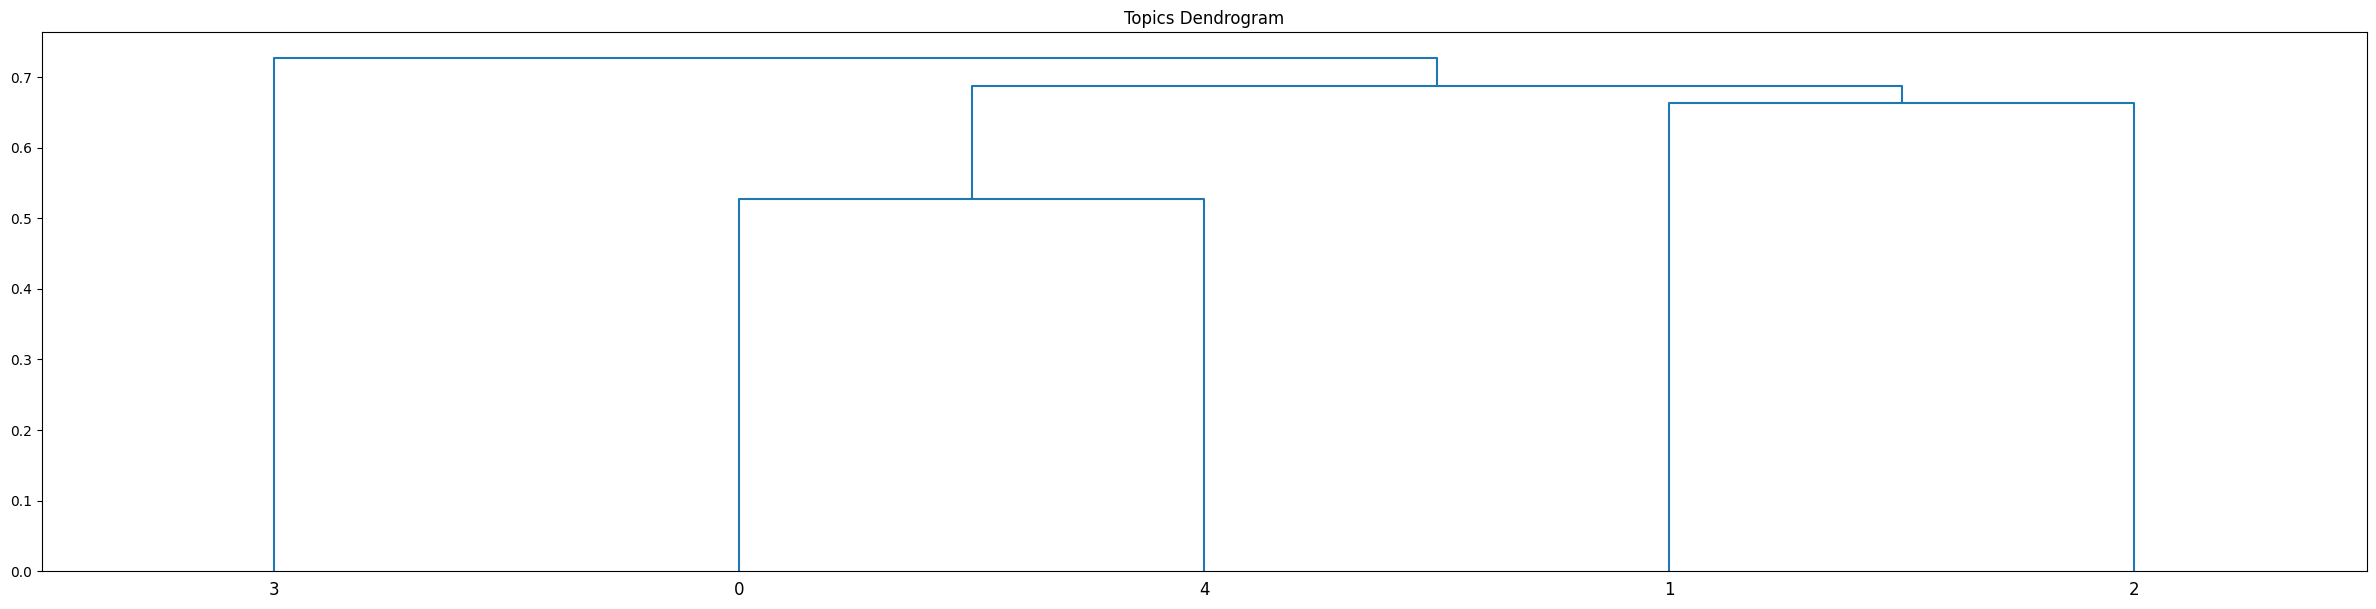

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

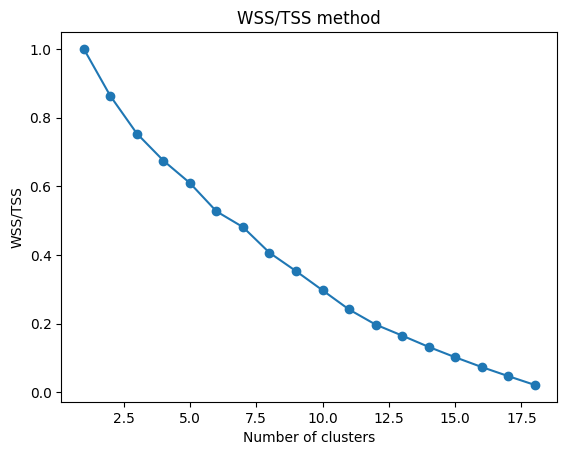

Dendrogram: 



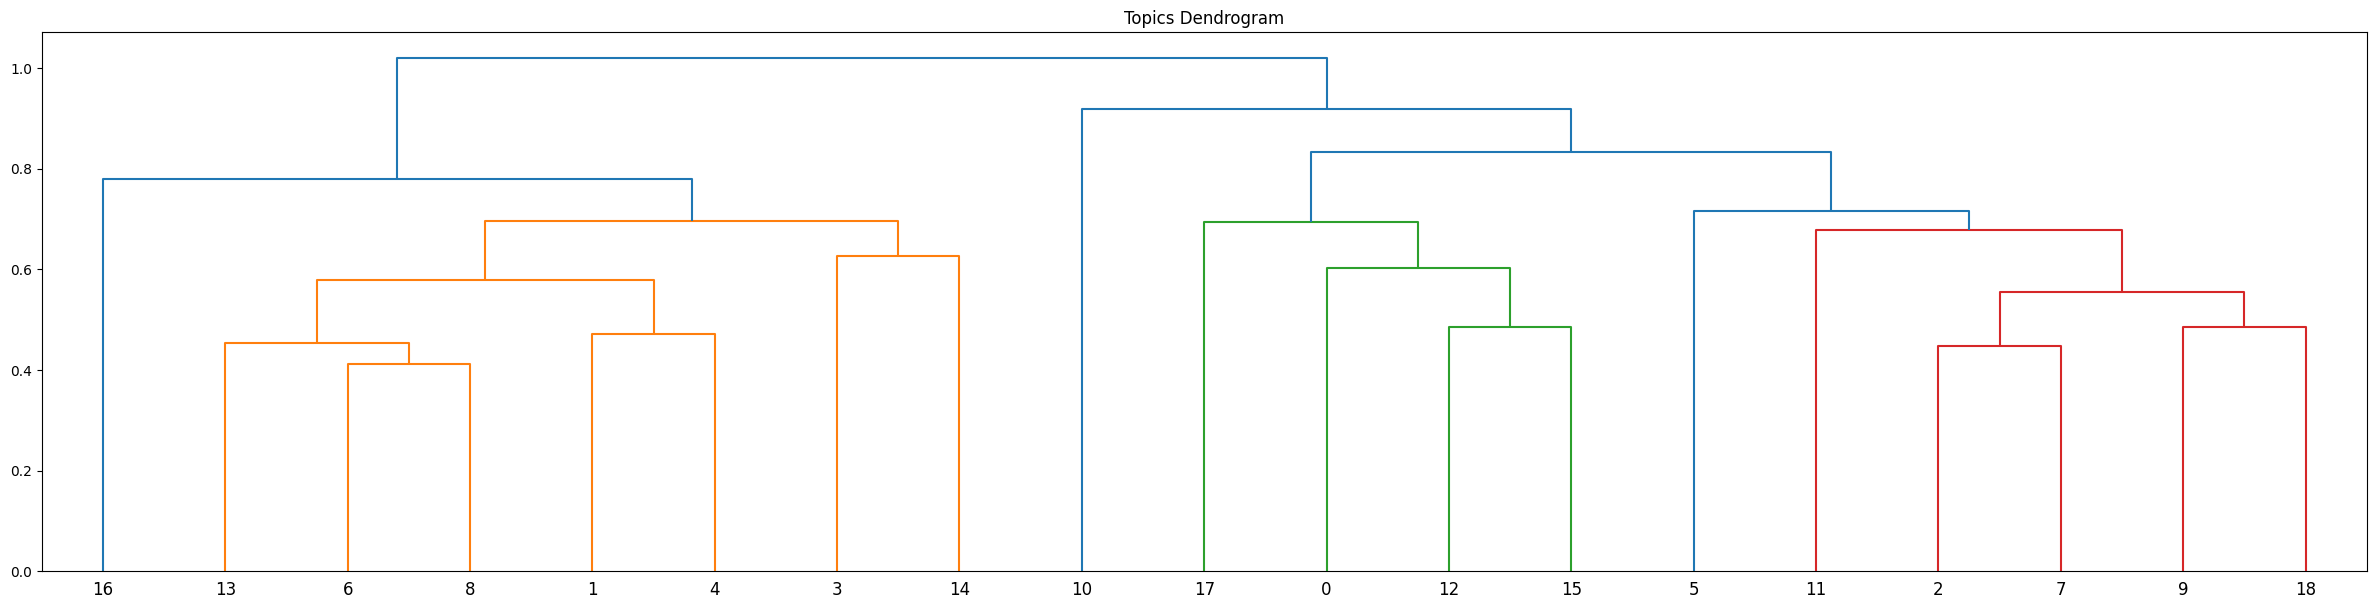

Less than two items in the topic
Less than two items in the topic
Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

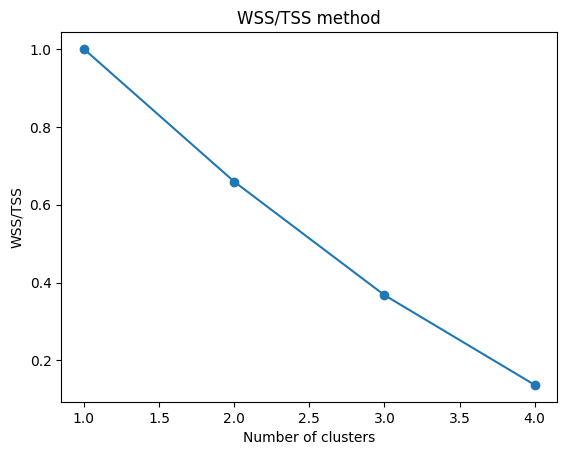

Dendrogram: 



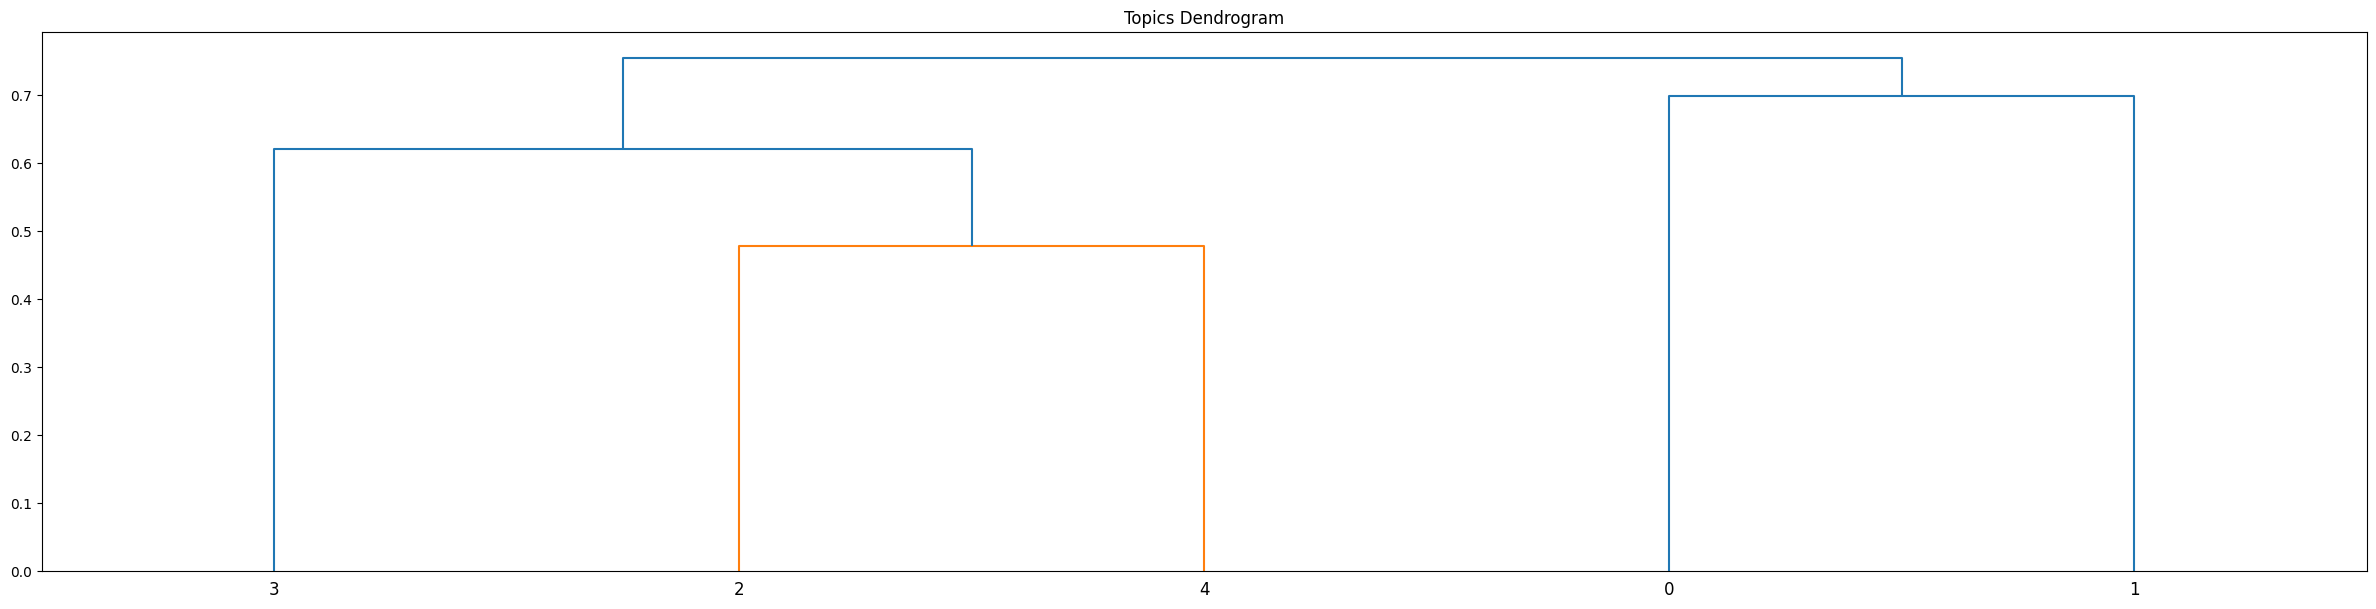

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

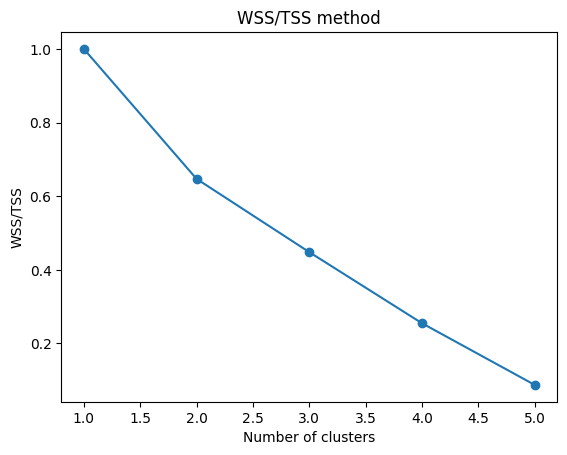

Dendrogram: 



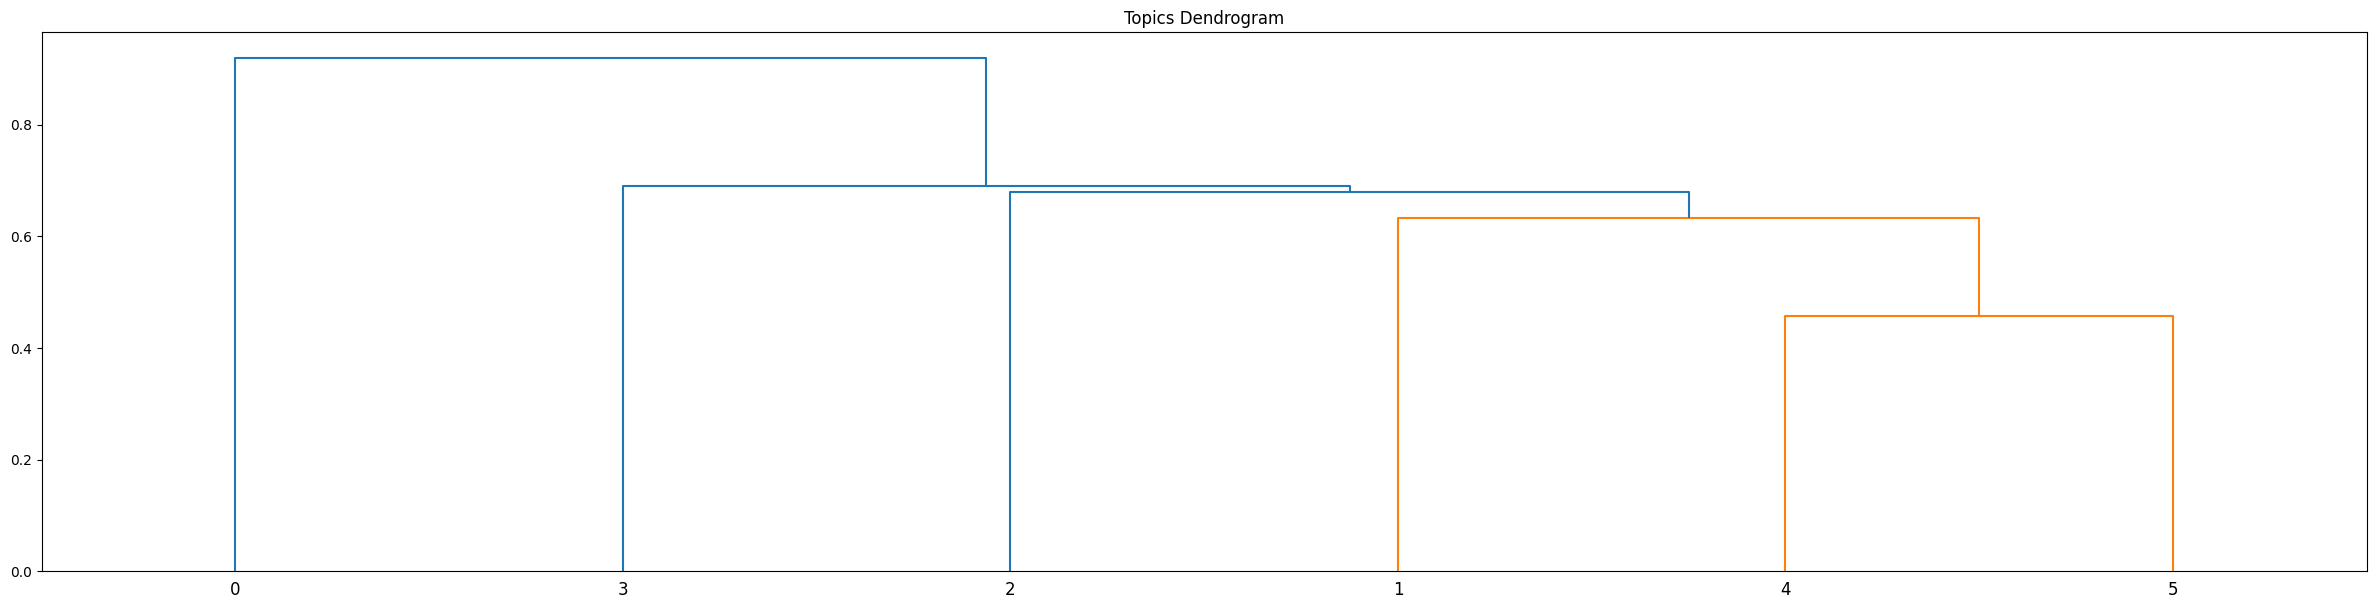

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

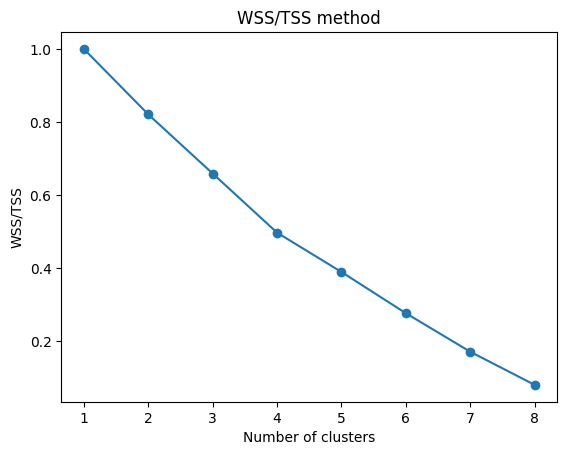

Dendrogram: 



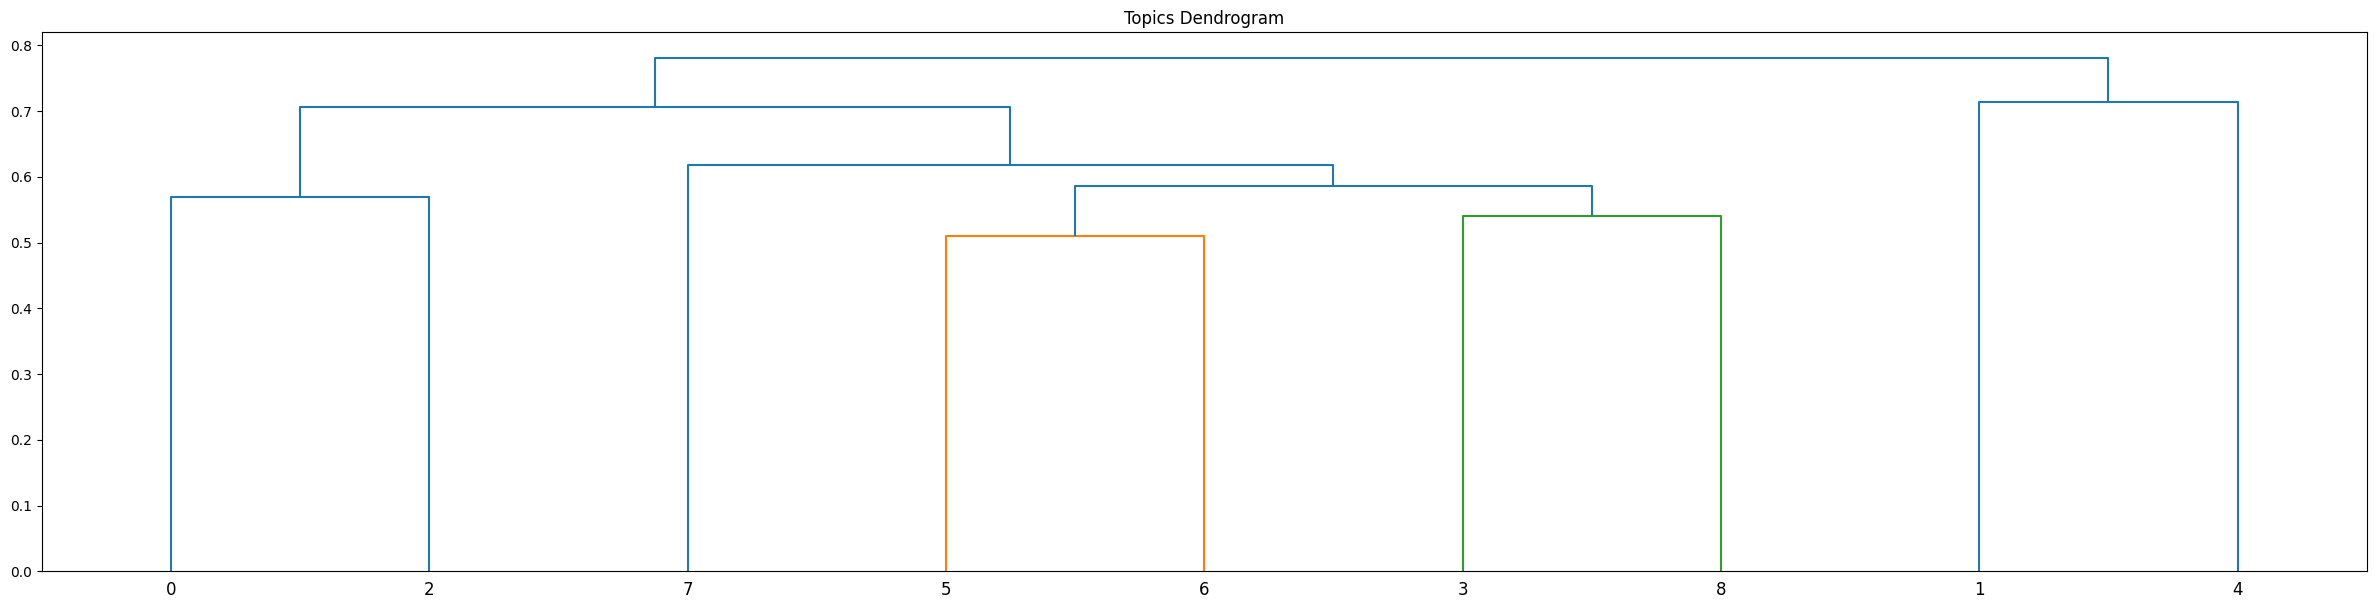

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

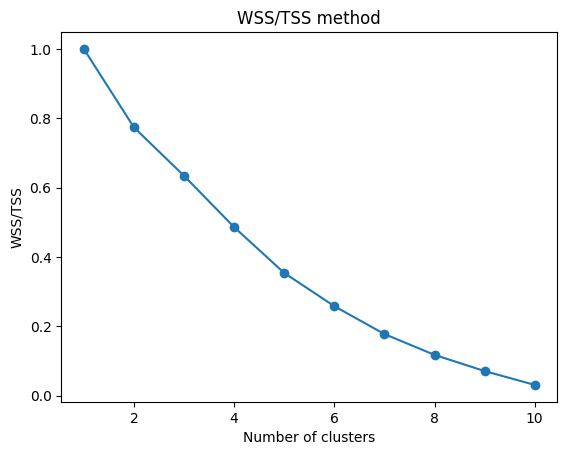

Dendrogram: 



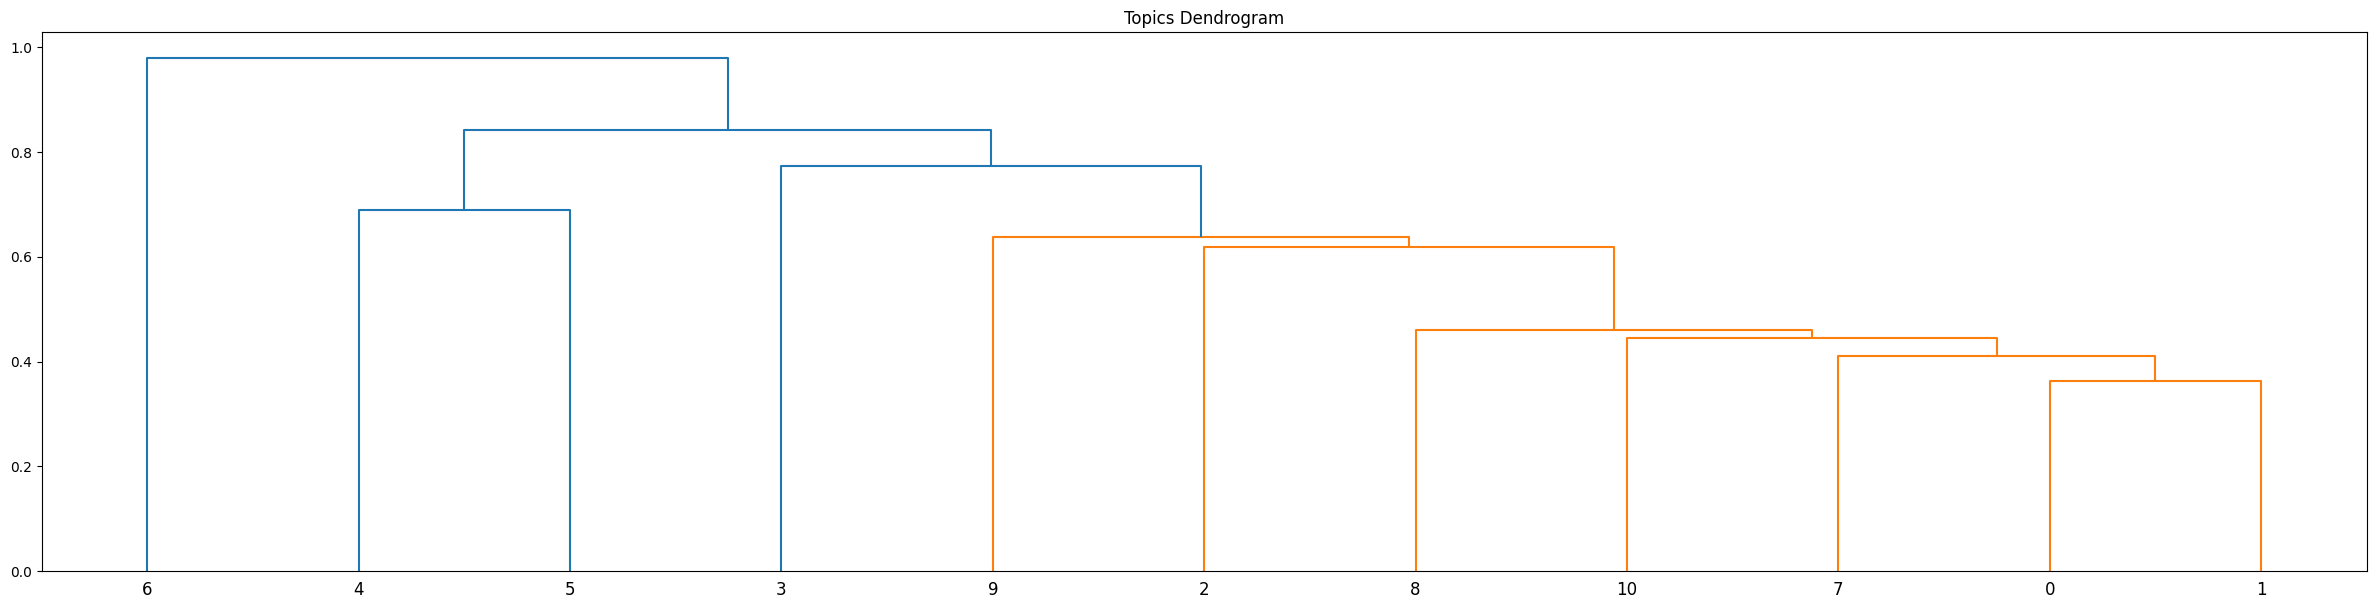

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

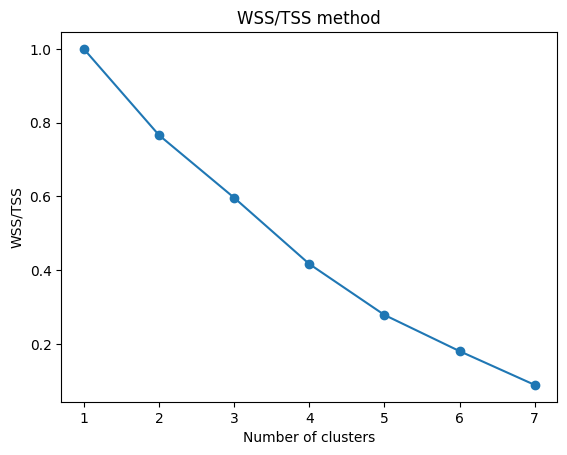

Dendrogram: 



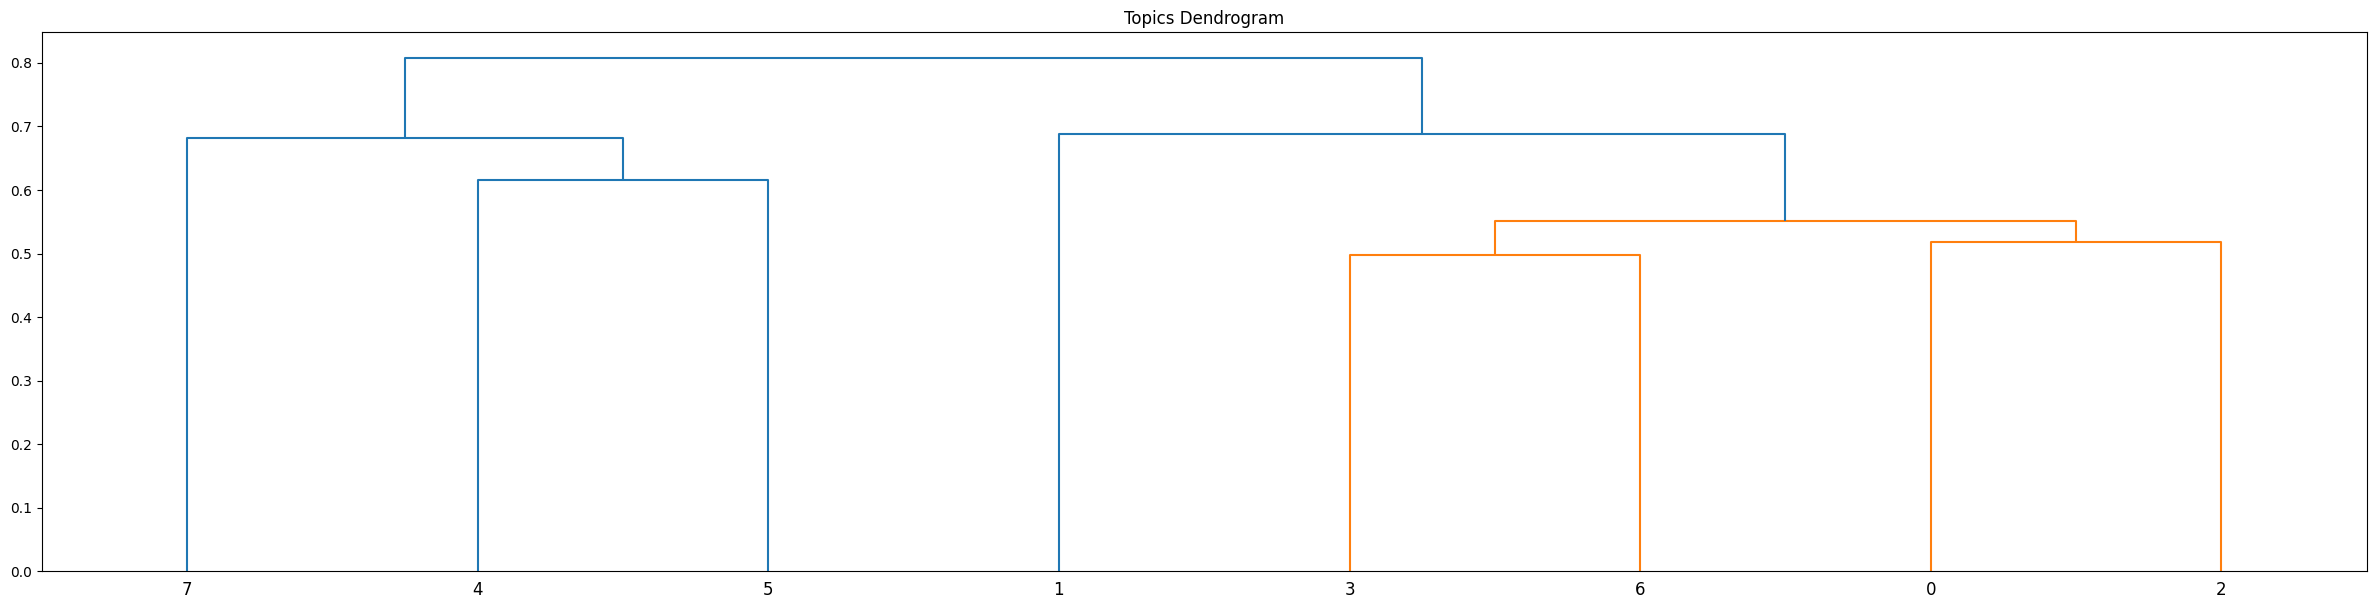

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

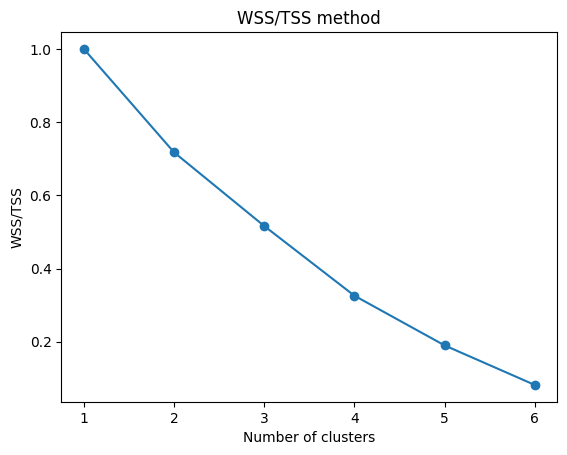

Dendrogram: 



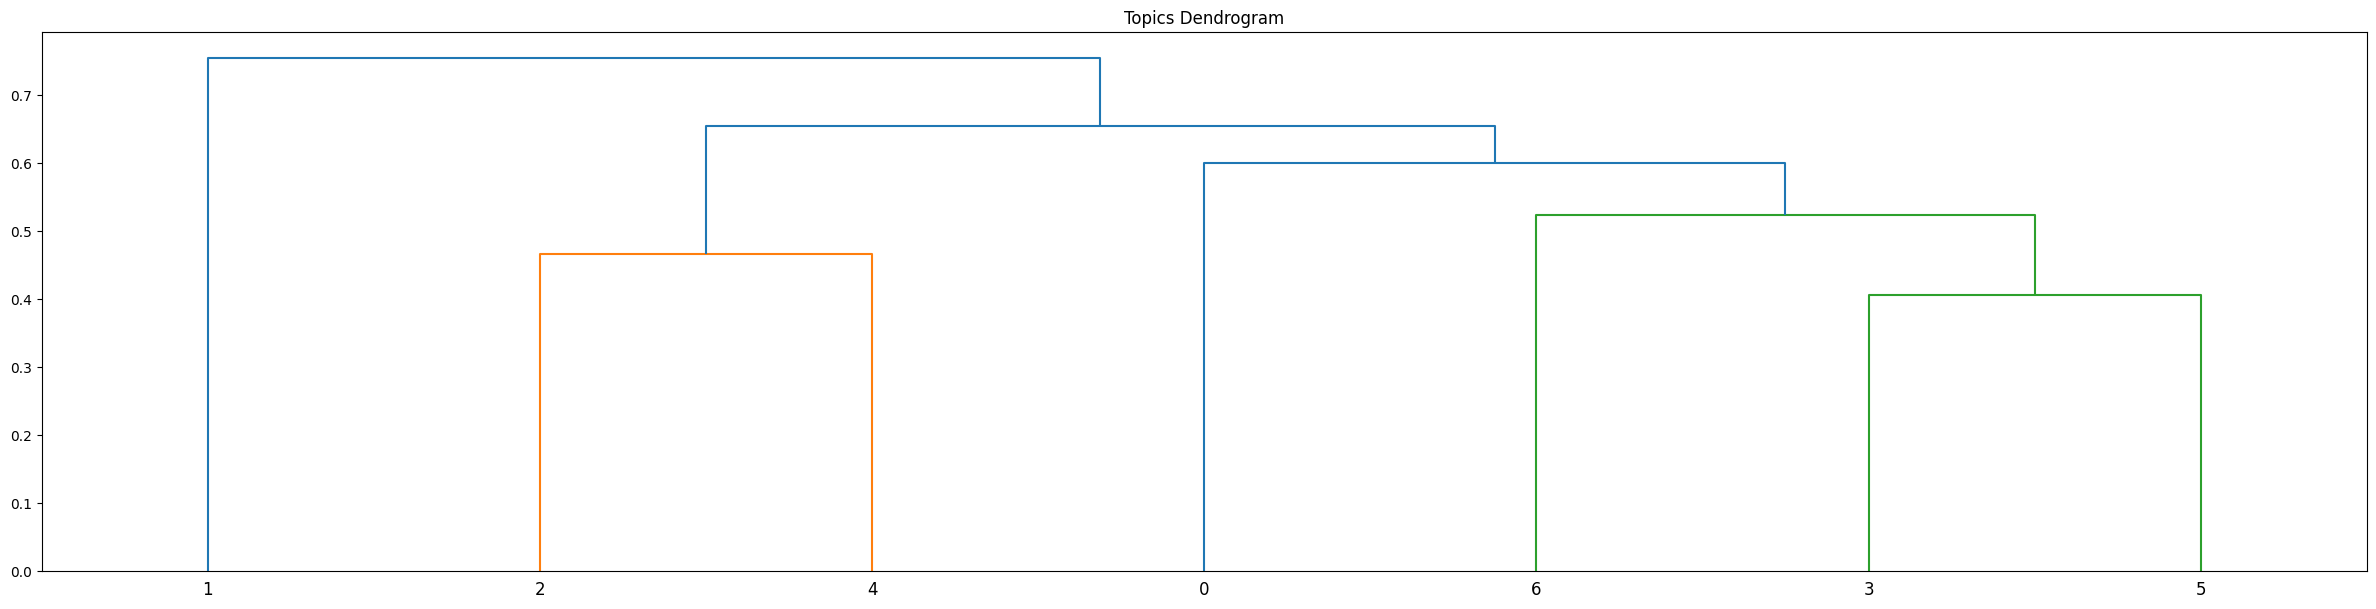

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

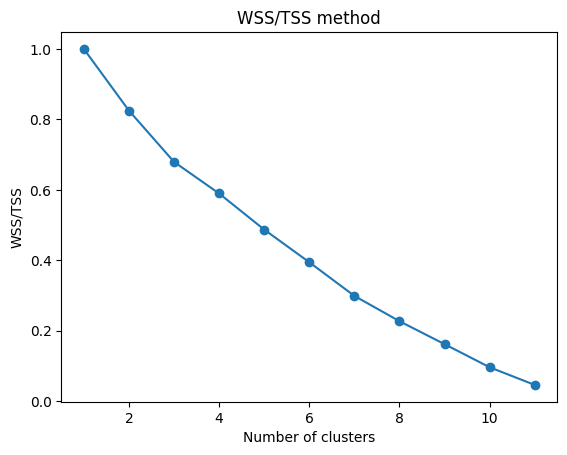

Dendrogram: 



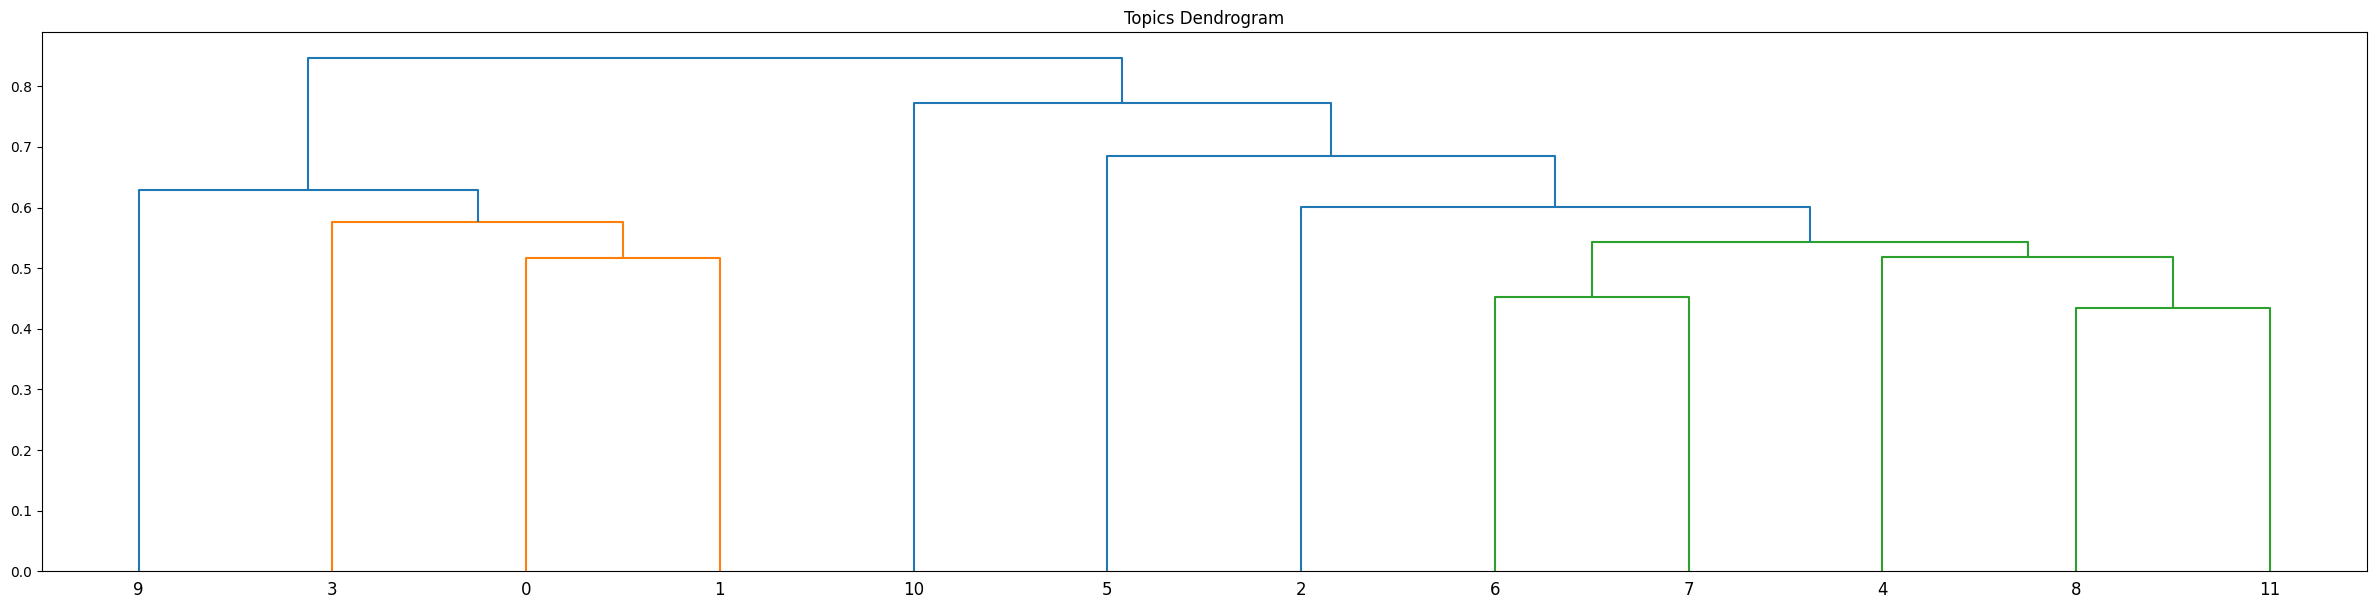

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

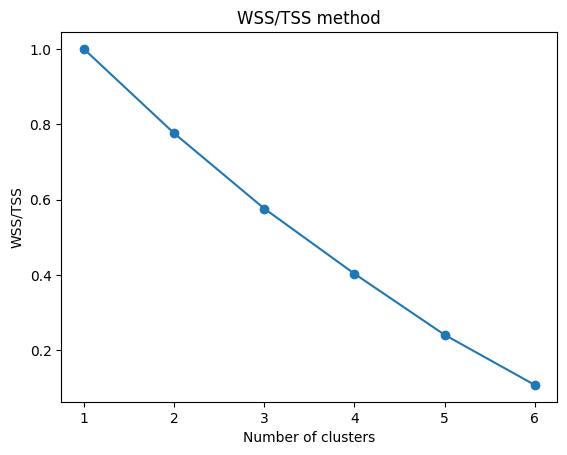

Dendrogram: 



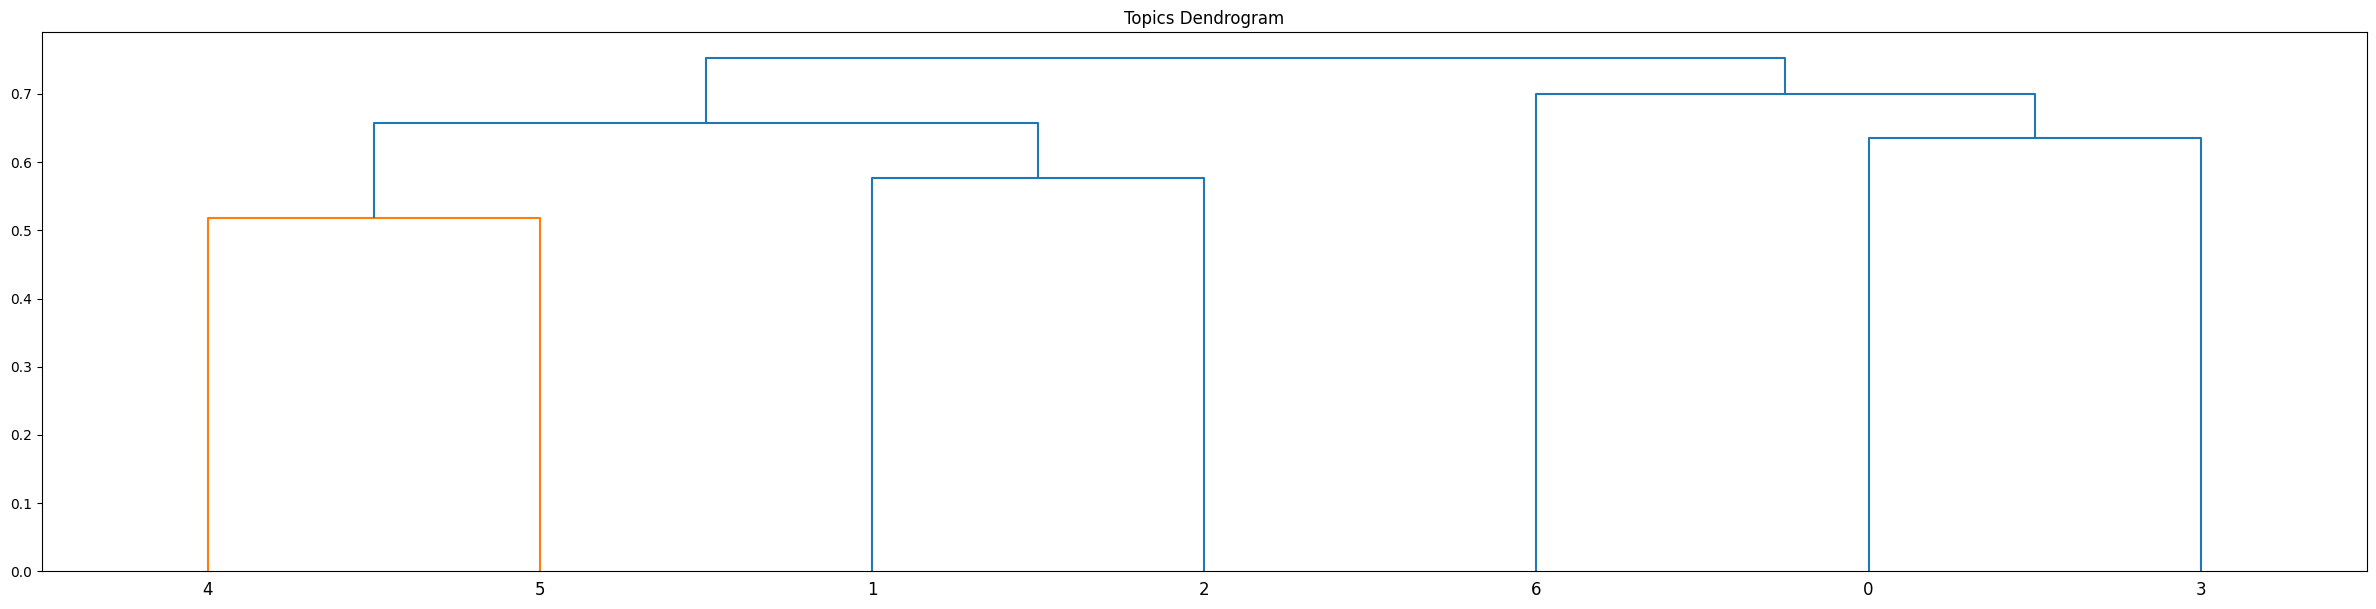

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


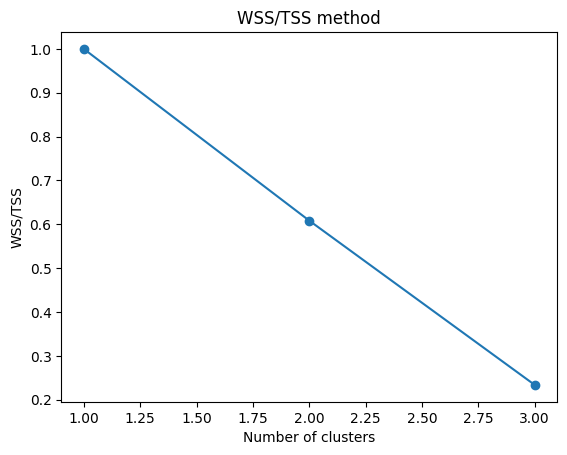

Dendrogram: 



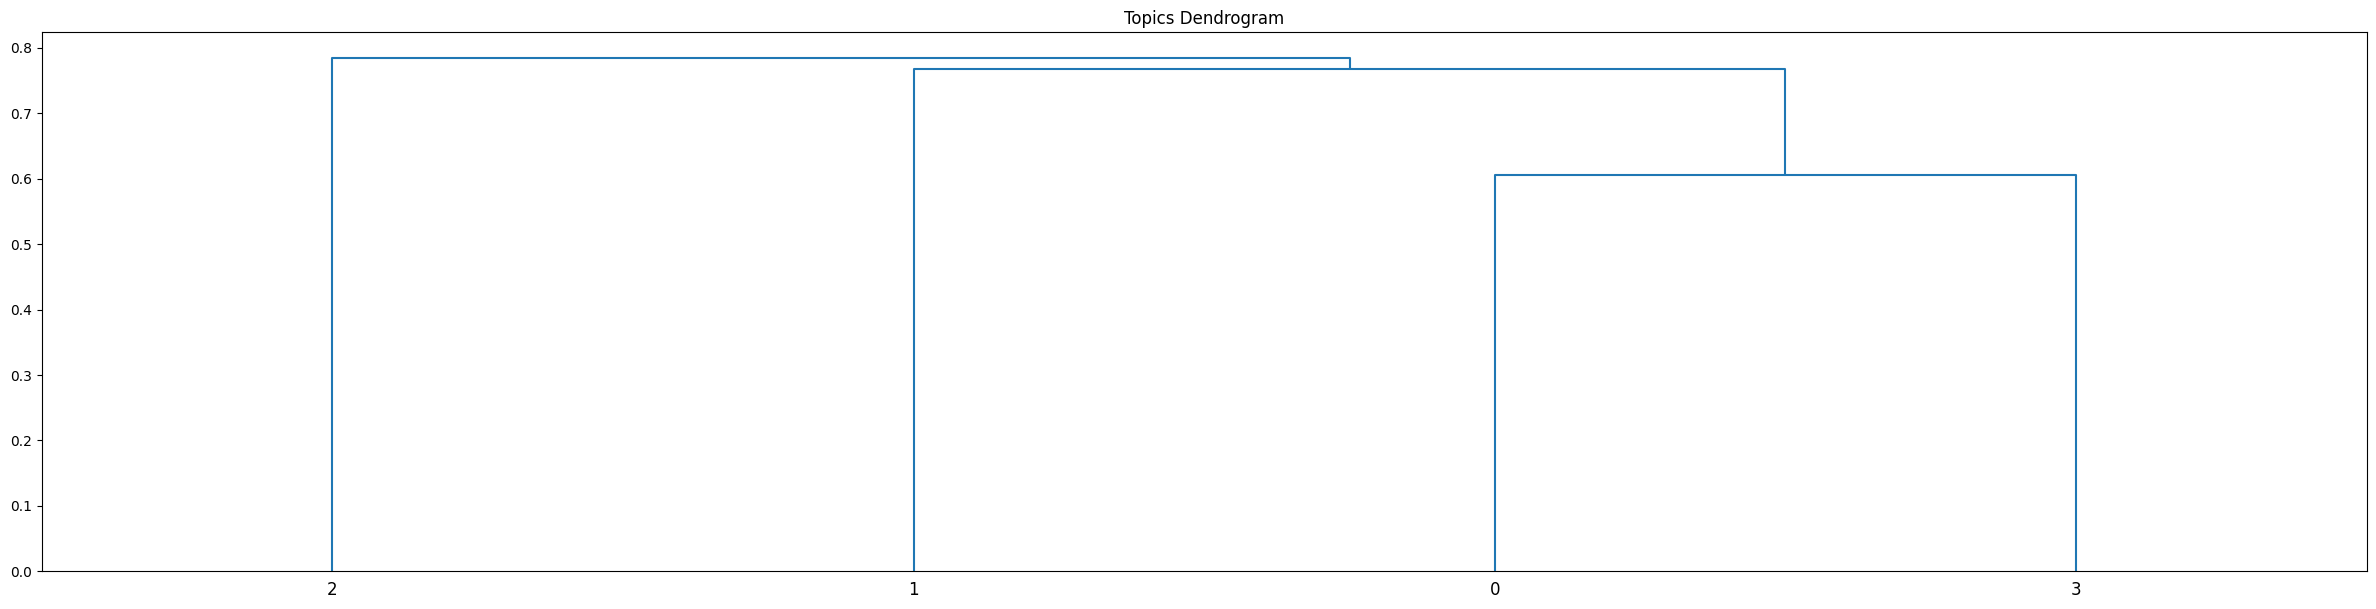

""


In [20]:
IndexedData.groupby('Topic').apply(lambda x: GraphAnalysis(x) if np.array(x).shape[0]>2 else print("Less than two items in the topic"))

## Clustering - Global

In [ ]:
# Reminder of the data used
x = np.array(IndexedData.loc[:, IndexedData.columns != "Topic"])

Testing the results of k-means algo

In [21]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)

c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

<Axes: xlabel='x', ylabel='y'>

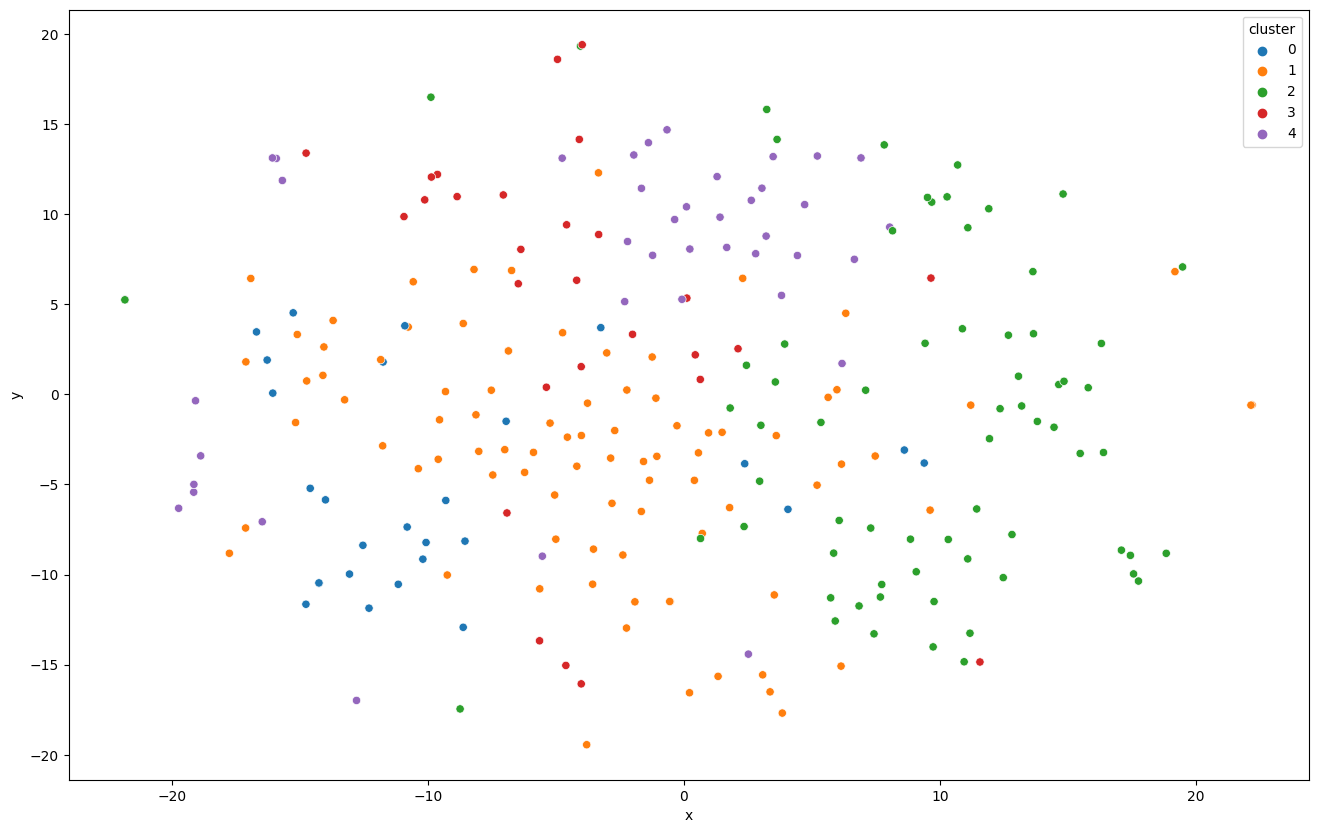

In [22]:
df = pd.DataFrame()
df["x"] = results[:,0]
df["y"] = results[:,1]
df["cluster"] = kmeans.labels_

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    hue="cluster",
    palette=sns.color_palette("tab10", 5),
    data=df,
    legend="full",
    )

Results of hclusters

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
df = pd.DataFrame()
# Hierachical clustering model
hc = AgglomerativeClustering(n_clusters = 5)
# Fit and predict on the data
y_hc = hc.fit_predict(x)
# Save the predictions as a column
df['y_hc']=y_hc

Results of GaussianMixture

In [26]:
from sklearn.mixture import GaussianMixture

In [27]:
# Fit the GMM model
gmm = GaussianMixture(n_components=5, n_init=5, random_state=42)
# Fit and predict on the data
y_gmm = gmm.fit_predict(x)
# Save the prediction as a column
df['y_gmm']=y_gmm

Results of DBSCAN

In [28]:
from sklearn.cluster import DBSCAN

In [29]:
# Fit the DBSCAN model
dbscan = DBSCAN(eps=0.8, min_samples=5) 
# Fit and predict on the data
y_dbscan = dbscan.fit_predict(x)
# Save the prediction as a column
df['y_dbscan'] = y_dbscan

## Clustering - Topic by Topic

Clustering Functions

In [54]:
def KMeansClust(x, n):
    
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit_predict(x)

    return clusters

def HClust(x, n): 
    
    # Hierachical clustering model
    hc = AgglomerativeClustering(n_clusters = n)
    # Fit and predict on the data
    yHC = hc.fit_predict(x)
    
    return yHC


def GaussianClust(x, n):
    # Fit the GMM model
    gmm = GaussianMixture(n_components=n, n_init=5, random_state=42)
    # Fit and predict on the data
    yGMM = gmm.fit_predict(x)

    return yGMM

def DBSCANClust(x, n):
    # Fit the DBSCAN model
    dbscan = DBSCAN(eps=0.8, min_samples=5) 
    # Fit and predict on the data
    yDBSCAN = dbscan.fit_predict(x)

    return yDBSCAN

In [ ]:
KMeansClust(IndexedData.loc[:, IndexedData.columns != "Topic"], 5)

## Testing Topic Modelling

In [313]:
DirPpath = Path(os.path.abspath('')).parent # Fetching the current directory path - Specific for ipynb file - For .py: Path(os.path.dirname(os.path.realpath(__file__)).replace("\\", "/"))


testPath  = str(DirPpath.absolute()) + "\PreProcessedData.csv"  
test = pd.read_csv(testPath, index_col=0)

In [314]:
import nltk


tokens = [nltk.word_tokenize(i) for i in test["PreProcessedText"]]

In [315]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(tokens)
# Create Corpus
texts = tokens
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 5), (24, 2), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
import gensim
from pprint import pprint
# number of topics
num_topics = 26
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(topic_model = lda_model, corpus = corpus, dictionary = id2word, mds='tsne')
panel